'\nprint((np.array(Bx_Z).shape))\nprint(np.unique(x_local)) \nprint(np.unique(y_local)) \nprint(np.unique(z_local)) \nprint(x_local_Z[1])\nprint(y_local_Z[1])\n'

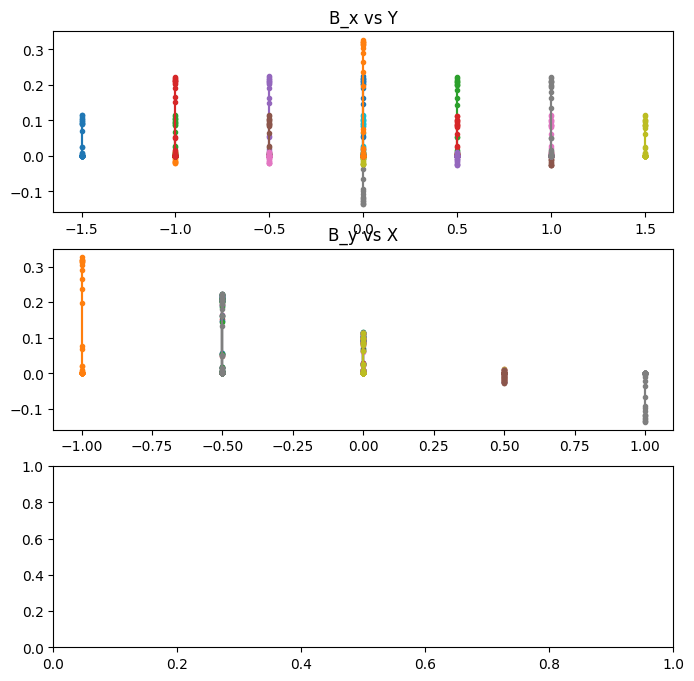

In [14]:
############################## NOTE 
# _x , _y = nomenclat
#
#
#
#
#####################################


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# for saving all plots in one pdf file 
def save_fig(filename): 
  
    p = PdfPages(filename)

    fig_nums = plt.get_fignums()  
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs: 
        fig.savefig(p, format='pdf') 
    p.close() 

############################ Existing Previous Measurement Datasets 
#file= '/Users/sumitnayak/Downloads/Datasets_QPM/PMQLLR02_2021_11_15_14.27.txt'  #4-- 18mm_2021_11_15
#file= '/Users/sumitnayak/Downloads/Datasets_QPM/PMQLLR02_2021_11_16_16.27.txt'  #4-- 18mm_2021_11_16
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/PMQLLR02_2022_10_12_11_41.txt' #10-- 18mm_2022_10_12
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/test_js2__202109301410_MAngle=0_PAngle=0_0.txt' #10-- 30mm_2021_09_30
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/test_js2__202109291442_MAngle=0_PAngle=0_0.txt' #10-- 30mm_2021_09_29
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/test_js2__202109161139_MAngle=0_PAngle=0_0.txt' #10-- 7mm_2021_09_16
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/test_js2__202109151542_MAngle=0_PAngle=90_0.txt' #10-- 7mm_2021_09_15

############################ New Measurement Datasets 
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/QPMLLR02-SNAR-Coarse-2-2-5_data2023_06_23_12.18.txt'
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/QPMLLR02-SNAR-Fine-1-1-2_data2023_06_23_19.07.txt'
###### Optional Dataset ##############file = '/Users/sumitnayak/Downloads/Datasets_QPM/QPMLLR03-SNAR-Coarse-4-4-10_data2023_06_27_17.06.txt'
###### Optional Dataset ##############file = '/Users/sumitnayak/Downloads/Datasets_QPM/QPMLLR03-SNAR-Coarse-4.5-4.5-5_data2023_06_28_14.43.txt' #Smooth side facing probe
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/QPMLLR03-SNAR-Fine-3-3-3_zxy_data2023_06_29_15.16.txt'  #Smooth side facing probe
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/QPMLLR03_SNAR_4.5-4.5-5_coarse_data2023_07_03_16.31.txt' #Rough side facing probe
###### Optional Dataset ##############file = '/Users/sumitnayak/Downloads/Datasets_QPM/QPMLLR03_SNAR_4.5-4.5-5_coarse_SmoothFacing_2023_07_04_15.12.txt' #Smooth side facing
#file = '/Users/sumitnayak/Downloads/Datasets_QPM/QPMLLR03_SNAR_4.5-4.5-5_coarse_Re-SmoothFacing_2023_07_04_18.23.txt'#Introduced shift in X,Y

#datafile = 'QPMLLR3_SNAR_4.5-4.5-5_2023_7_14_18_23.txt'
datafile = 'QPMLLR1MagAng0RotAng0.txt'
# ------------------------ Extraction by List Appending Method --------------------------
'''
f = open(file,'r')
x_local, y_local,z_local, B_x, B_y,B_z =[],[],[],[],[],[]
for n,lines in enumerate(f):
    data = lines.split()
    if n>=4 and len(data)!=0 :
        x_local.append(float(data[5]))
        y_local.append(float(data[6]))
        z_local.append(float(data[7]))
        B_x.append(float(data[8]))
        B_y.append(float(data[9]))
        B_z.append(float(data[10]))

step=len(np.unique(z_local)) #------------------> value of data set size after which same z value is found
Bx_Z, By_Z,Bz_Z, x_local_Z, y_local_Z, z_local_Z, z_local_val=[],[],[],[],[],[],[]

for j in range(0,step):
    Bx_Z.append([])
    y_local_Z.append([])
    
    By_Z.append([])
    x_local_Z.append([])
    
    Bz_Z.append([])
    z_local_Z.append([])
    z_local_val.append(z_local[j])
    
    for i in range(j,len(x_local),step):
        #print(i)
        Bx_Z[j].append(B_x[i])
        y_local_Z[j].append(y_local[i])
        
        By_Z[j].append(B_y[i])
        x_local_Z[j].append(x_local[i])
        
        Bz_Z[j].append(B_z[i])
        z_local_Z[j].append(z_local[i])
        
z_local_val= np.array(z_local_val)
z_local_val= np.reshape(z_local_val,(len(z_local_val),1)) #unique values of Z at which measurement is done
'''
#-------------------------------------------------------------------------------------------------

# ------------------------ Extraction by Numpy gentext Method --------------------------

data = np.genfromtxt(datafile) #extract each column as array from the data set

x_local= data[0:,5]
y_local= data[0:,6]
z_local= data[0:,7]
B_x = data[0:,10]
#B_y = data[0:,9]
B_y = data[0:,10]

step=len(np.unique(z_local)) #----------> number after which Z values repeated / number of diff Z position
num=len(x_local) #-------------->Total Number of data points for a single parameter

# Following are the conversion form 1D data to 2D Matrix (in which eaach row correspond to values at each diff. Z- planes)

x_local_Z = [x_local[j:num:step]  for j in range(step)]
y_local_Z = [y_local[j:num:step]  for j in range(step)]
z_local_Z = [z_local[j:num:step]  for j in range(step)]
Bx_Z = [B_x[j:num:step]  for j in range(step)]
By_Z = [B_y[j:num:step]  for j in range(step)]
#Bz_Z = [B_z[j:num:step]  for j in range(step)]

z_local_val= np.unique(z_local) #unique values of Z at which measurement is done
#print(z_local_val.shape)

#-------------------------------------------------------------------------------------------------

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(y_local_Z,Bx_Z,'.-') # plot for Bx vs Y
plt.title('B_x vs Y')
plt.subplot(3,1,2)
plt.plot(x_local_Z,By_Z,'.-') #plot for By vs X
plt.title('B_y vs X')
plt.subplot(3,1,3)
#plt.plot(z_local_Z,Bz_Z,'.-') # Plot for Bz vs Z
#plt.title('B_z vs Z')

plot_1='{}__B_vs_XYZ.pdf'.format(datafile)
save_fig(plot_1)


'''
print((np.array(Bx_Z).shape))
print(np.unique(x_local)) 
print(np.unique(y_local)) 
print(np.unique(z_local)) 
print(x_local_Z[1])
print(y_local_Z[1])
'''

In [15]:
#------------------------- Separate Fit (Linear)
from scipy.optimize import curve_fit

############## For X-component of the Field
def fit_func(X, B_00, B_10, B_01): # Fit Function 
    x,y = X
    return B_00 + B_10*x + B_01*y

param_X, Bx_00, Bx_10,Bx_01, chisq_x=[],[],[],[],[] #blank list for storing values into it

for i in range(0,step):
    x = np.array(x_local_Z[i])
    y = np.array(y_local_Z[i])
    z = np.array(Bx_Z[i])

    param,pocv= (curve_fit(fit_func, (x,y), z)) # fitting done using CurveFit command
    param_X.append(param) # all parameters for each single Z-plane
    Bx_00.append(param[0]) 
    Bx_10.append(param[1])
    Bx_01.append(param[2])
    
    fit_val= fit_func((x,y),*param) # fitting value using above parameters
    err=1e-4 #assumed standaard fixed error
    chisqr=np.sum(((z-fit_val)/err)**2) #chisquare sum
    chisq_x.append(chisqr)# storing the chisquare sum

from scipy.optimize import fsolve #for solving simulteneous equation

def alpha_func(X): #Equation for G & Alpha
    G,alpha=X
    return [G * np.sin(alpha) - Bx_10[i] ,
            G * np.cos(alpha) - Bx_01[i] ]

G_x, alpha_x=[],[]
for i in range(0,step): #solving out for G & Alpha
    root_x = fsolve(alpha_func,[1,1]) #----------> [1,1] = is the initial default guess of the root
    #print(root_x)
    G_x.append(root_x[0])
    alpha_x.append(root_x[1]*57.29) #converting values into degree
############## For Y-component of the Field (same as done for X-component )

param_Y,By_00, By_10, By_01,chisq_y=[],[],[],[],[]

for i in range(0,step):
    x = np.array(x_local_Z[i])
    y = np.array(y_local_Z[i])
    z = np.array(By_Z[i])

    param,pocv=(curve_fit(fit_func, (x,y), z)) #(same as done for X-component )
    #print(param)
    param_Y.append(param) #(same as done for X-component )
    By_00.append(param[0])
    By_10.append(param[1])
    By_01.append(param[2])
    
    fit_val= fit_func((x,y),*param)
    err=1e-4
    chisqr=np.sum(((z-fit_val)/err)**2) #(same as done for X-component )
    chisq_y.append(chisqr)

def alpha_func(Y): #(same as done for X-component )
    G,alpha=Y
    return [G * np.cos(alpha) - By_10[i] ,
            -G * np.sin(alpha) - By_01[i] ]

G_y, alpha_y=[],[]
for i in range(0,step):
    root_y = fsolve(alpha_func,[1,1]) #----------> [1,1] = is the initial default guess of the root
    #print(root_y)
    G_y.append(root_y[0])
    alpha_y.append(root_y[1]*57.29)
    
# --- Calculating Magnetic Centre directly from fitting formula    
magcentre_x,magcentre_y=[],[]

for i in range(0,step):
    y=-(Bx_00[i]/Bx_01[i]) # Yc - centre in Y
    magcentre_y.append(y)
    x=-(By_00[i]/By_10[i]) # Xc - centre in X
    magcentre_x.append(x)    
#print(magcentre_x)

# --- Calculating Magnetic Centre from analytical formulation (refer to the report )
alpha_x2 = np.arctan(np.array(Bx_10)/np.array(Bx_01))*57.29 # alpha_x by analytical way
G_x2 = np.sqrt((np.array(Bx_10)**2)+(np.array(Bx_01)**2)) # Gradient_x by analytical way

alpha_y2 = np.arctan(-np.array(By_01)/np.array(By_10))*57.29 # alpha_y by analytical way
G_y2 = np.sqrt((np.array(By_10)**2)+(np.array(By_01)**2)) # Gradient_y by analytical way

param_X=np.array(param_X)
param_Y=np.array(param_Y) # converting list in to array (Optional here, not required)


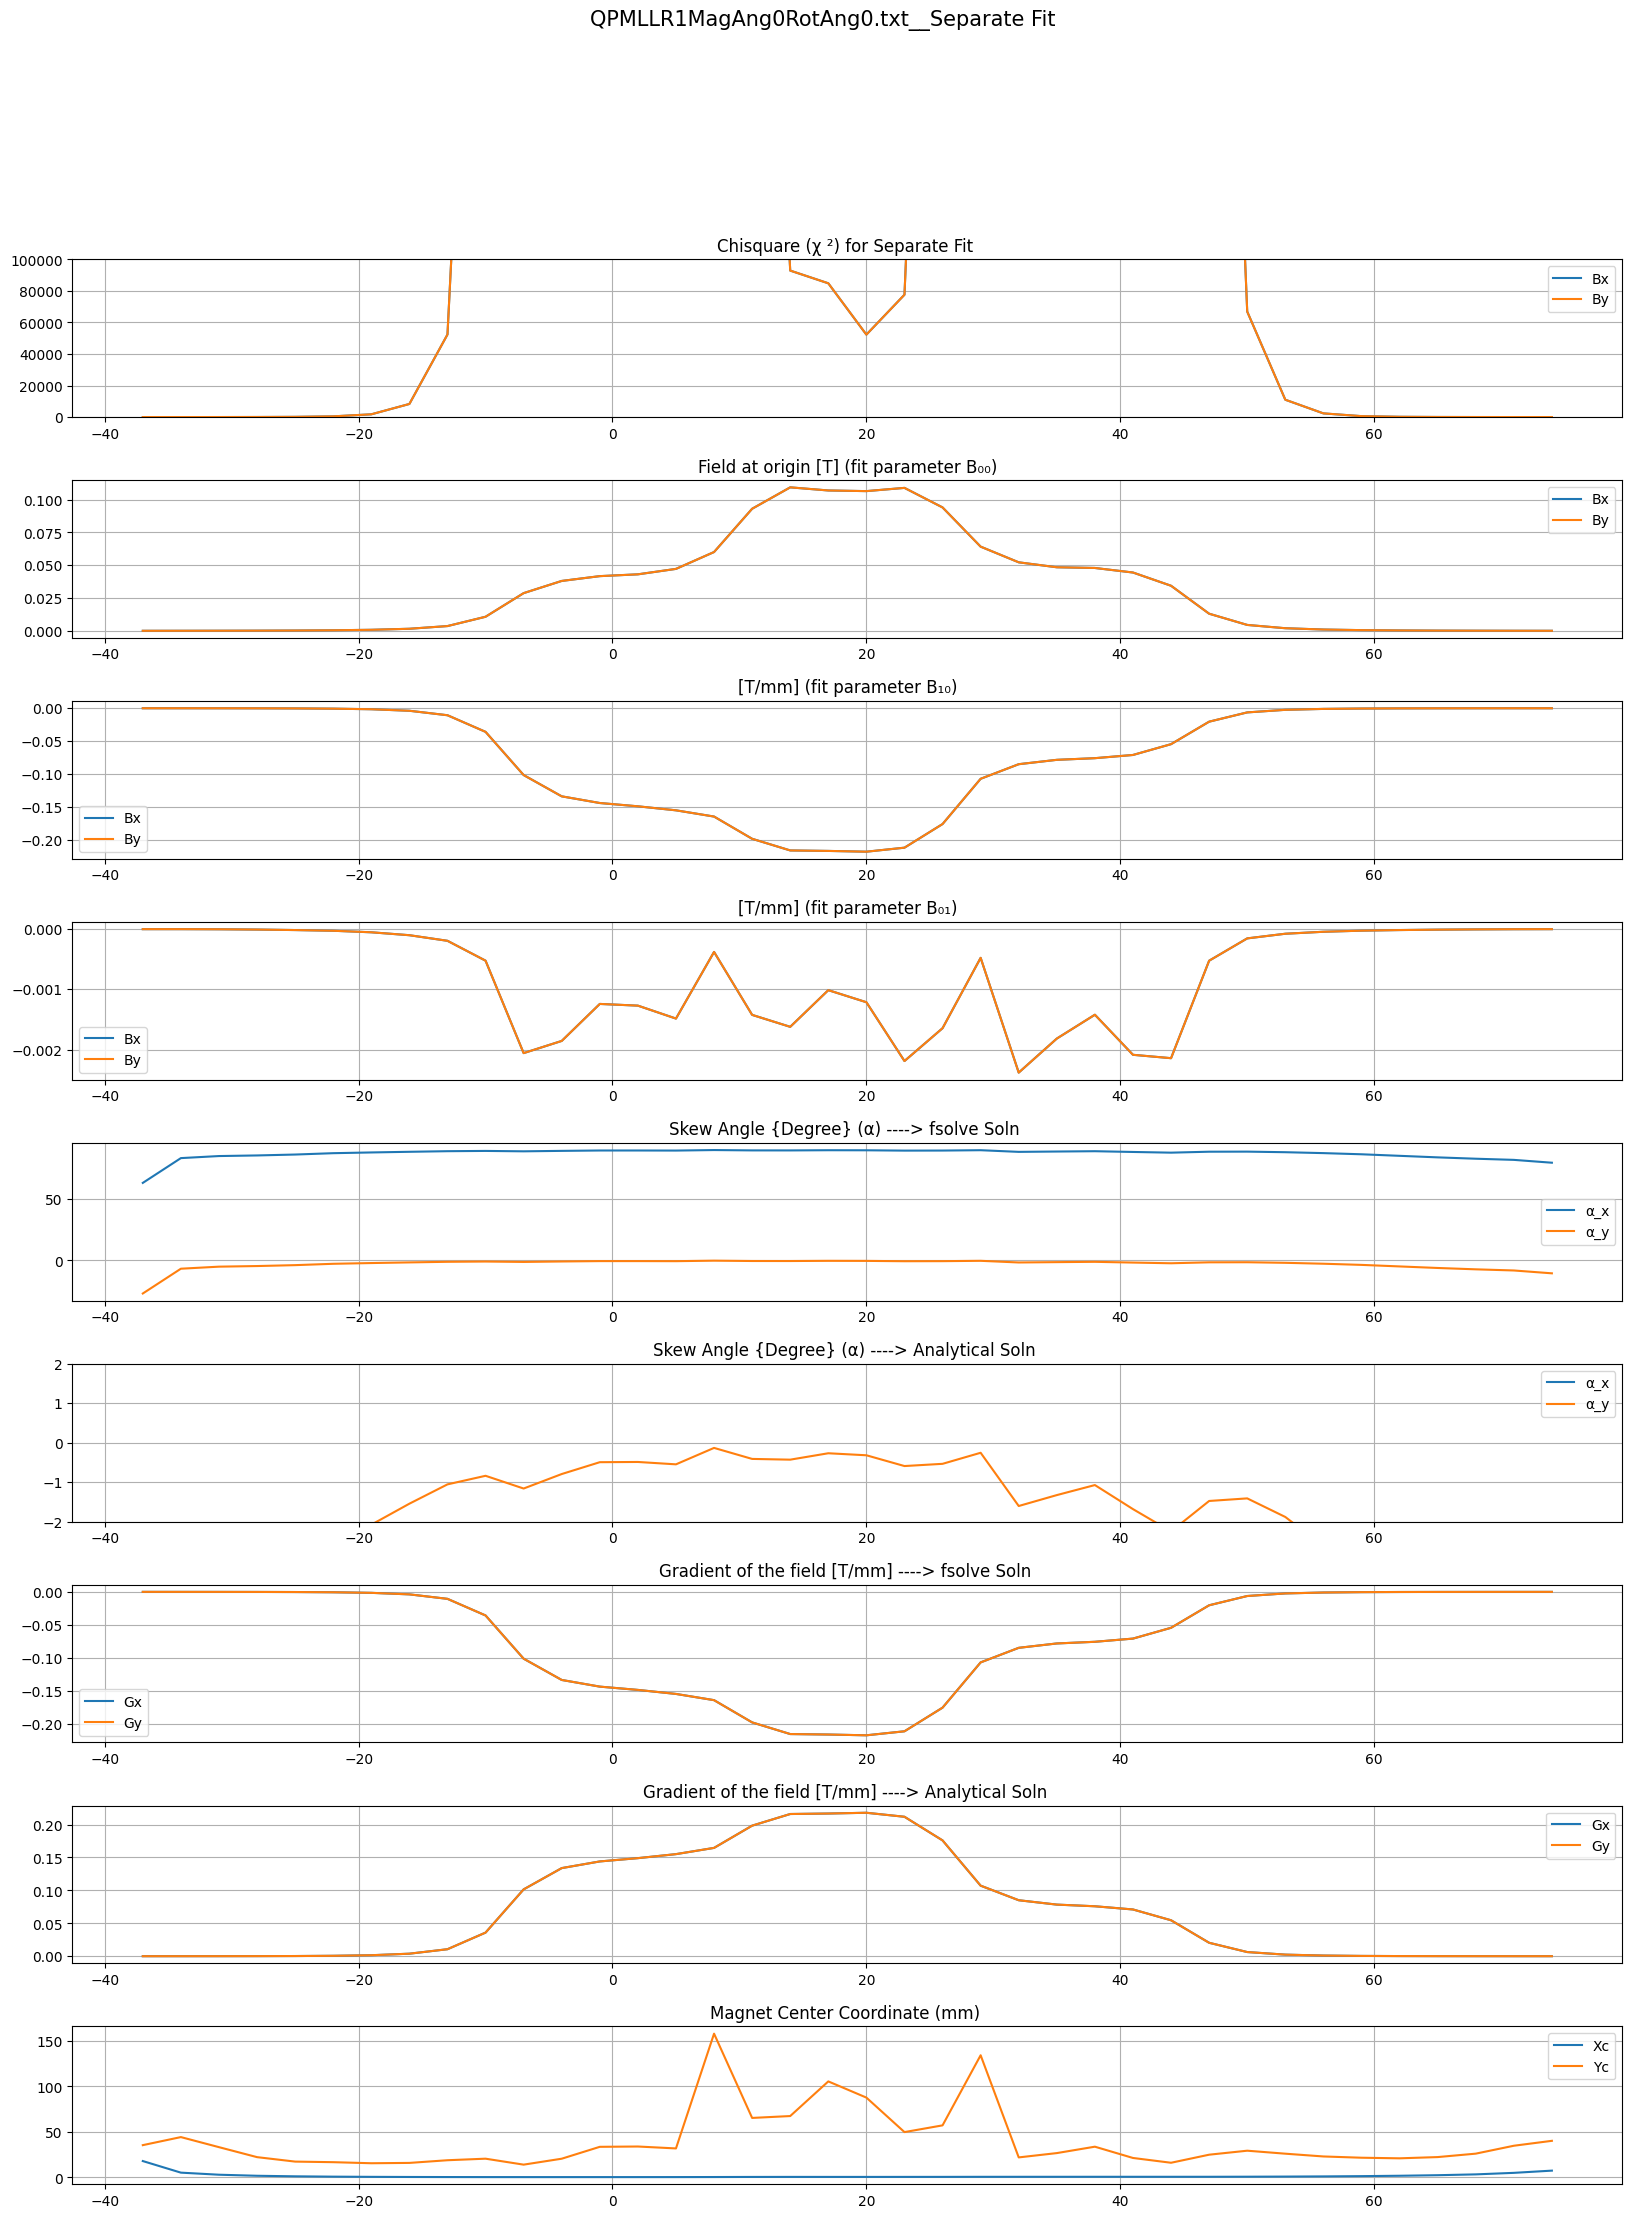

In [16]:
# Plotting each parameters vs Z (that are calculated in previous shell)

plt.figure(figsize=(20,25))
row = 9; col =1
plt.subplots_adjust(hspace =.4)
plt.suptitle("{}__Separate Fit".format(datafile), fontsize = 15)

plt.subplot(row,col,1)
plt.plot(z_local_val,chisq_x,'-',label='Bx')
plt.plot(z_local_val,chisq_y,'-',label='By')
plt.ylim(0,100000)
plt.title('Chisquare (\u03C7 \u00b2) for Separate Fit ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,2)
plt.plot(z_local_val,Bx_00,'-',label='Bx')
plt.plot(z_local_val,By_00,'-',label='By')
#plt.ylim(-0.6,0.01)
plt.title('Field at origin [T] (fit parameter B\u2080\u2080)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,3)
plt.plot(z_local_val,Bx_10,'-',label='Bx')
plt.plot(z_local_val,By_10,'-',label='By')
#plt.ylim(-0.03,+0.02)
plt.title('[T/mm] (fit parameter B\u2081\u2080)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,4)
plt.plot(z_local_val,Bx_01,'-',label='Bx')
plt.plot(z_local_val,By_01,'-',label='By')
#plt.ylim(-0.03,+0.1)
plt.title('[T/mm] (fit parameter B\u2080\u2081)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,5)
#fig5=plt.figure(figsize=(20,2))
plt.plot(z_local_val,alpha_x,'-',label='\u03B1_x')
plt.plot(z_local_val,alpha_y,'-',label='\u03B1_y')
#plt.ylim(-2,2)
plt.title('Skew Angle {Degree} (\u03B1) ----> fsolve Soln ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,6)
plt.plot(z_local_val,alpha_x2,'-',label='\u03B1_x')
plt.plot(z_local_val,alpha_y2,'-',label='\u03B1_y')
plt.title('Skew Angle {Degree} (\u03B1) ----> Analytical Soln ')
plt.ylim(-2,2)
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,7)
plt.plot(z_local_val,G_x,'-',label='Gx')
plt.plot(z_local_val,G_y,'-',label='Gy')
#plt.ylim(0.05,.06)
plt.title('Gradient of the field [T/mm] ----> fsolve Soln ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,8)
#fig66=plt.figure(figsize=(20,2))
plt.plot(z_local_val,G_x2,'-',label='Gx')
plt.plot(z_local_val,G_y2,'-',label='Gy')
#plt.ylim(0.05,.06)
plt.title('Gradient of the field [T/mm] ----> Analytical Soln ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,9)
plt.plot(z_local_val,magcentre_x,'-',label='Xc')
plt.plot(z_local_val,magcentre_y,'-',label='Yc')
#plt.ylim(-.50,0.4)
plt.title('Magnet Center Coordinate (mm) ')
plt.legend(loc='best')
plt.grid()

plot_2='{}__SeparateFit.pdf'.format(datafile)
save_fig(plot_2)

In [4]:
#-------------- SIMULTANEOUS FIT OF 6 Parameters {Bx_00, Bx_10, Bx_01,By_00, By_10, By_01}--------------
# This fitting is done by combining both of the files in to single array

from scipy.optimize import least_squares

#defining blank list of variables
Bx_00_6simult,Bx_10_6simult,Bx_01_6simult,By_00_6simult,By_10_6simult,By_01_6simult=[],[],[],[],[],[]
chisq_6param,chisq_4param=[],[]

def simult_fit_6(X):#fitting function for 6 parameter
    Bx_00, Bx_10, Bx_01,By_00, By_10, By_01 = X
    return np.array([ z1-(Bx_00 + Bx_10*x1 + Bx_01*y1) ,
                     w1-(By_00 + By_10*x1 + By_01*y1) ]).flatten() #both X,Y values are concatenated in single array

guess_initial=np.array([0.02,0,-0.1,0.02,-0.1,0]) #----------->assumed from graph plotted earlier


for i in range(0,step):
    x1 = np.array(x_local_Z[i])
    y1 = np.array(y_local_Z[i])
    z1 = np.array(Bx_Z[i])
    w1 = np.array(By_Z[i])
    res_1 = least_squares(simult_fit_6,guess_initial) #done with least_square command
    #print(res_1.x)
    Bx_00_6simult.append(res_1.x[0])
    Bx_10_6simult.append(res_1.x[1])
    Bx_01_6simult.append(res_1.x[2])
    By_00_6simult.append(res_1.x[3])
    By_10_6simult.append(res_1.x[4])
    By_01_6simult.append(res_1.x[5])
    
    fit_val= simult_fit_6((res_1.x))
    err=1e-4 #fixed value of error considered
    chisqr3=np.sum(((fit_val)/err)**2) #chisquaare sum calculation
    chisq_6param.append(chisqr3)


#----------------------- SIMULTANEOUS FIT OF 4 Parameters {Bx_00, By_00, G, Alpha}----------------------
# This fitting is done by combining both of the files in to single array but for 4 parameter

Bx_00_4simult,By_00_4simult,G_4simult,alpha_4simult=[],[],[],[]

def simult_fit_4(X): #fitting function
    Bx_00, By_00, G, alpha = X
    return np.array([ z1-(Bx_00 + (G*(np.sin(alpha)))*x1 + (G*(np.cos(alpha)))*y1) ,
                     w1-(By_00 + (G*(np.cos(alpha)))*x1 - (G*(np.sin(alpha)))*y1) ]).flatten()

guess_initial=np.array([0.0,0.0,-0.05,-0.005])

for i in range(0,step):
    x1 = np.array(x_local_Z[i])
    y1 = np.array(y_local_Z[i])
    z1 = np.array(Bx_Z[i])
    w1 = np.array(By_Z[i])
    res_2 = least_squares(simult_fit_4,guess_initial) #done similar as 6 parameter fitting
    #print(res_2.x)
    Bx_00_4simult.append(res_2.x[0])
    By_00_4simult.append(res_2.x[1])
    G_4simult.append(res_2.x[2])
    alpha_4simult.append(res_2.x[3]*57.29)
    
    fit_val= simult_fit_4((res_2.x))
    err=1e-4
    chisqr4=np.sum(((fit_val)/err)**2) #done similar as 6 parameter fitting
    chisq_4param.append(chisqr4)
    
    
magcentre_x_6simult,magcentre_y_6simult=[],[]
magcentre_x_4simult,magcentre_y_4simult=[],[]

#------------> Magnetic Centre from 6 parameters Simultaneous Fitting equations

def magcentre_6param(X):
    Xc , Yc = X
    return [Bx_00_6simult[i] + Bx_10_6simult[i]*Xc + Bx_01_6simult[i]*Yc ,
           By_00_6simult[i] + By_10_6simult[i]*Xc + By_01_6simult[i]*Yc ]

#------------> Magnetic Centre from 4 parameters Simultaneous Fitting equations

def magcentre_4param(X):
    Xc , Yc = X
    return [Bx_00_4simult[i] + G_4simult[i]*np.sin(alpha_4simult[i]*(np.pi/180))*Xc + G_4simult[i]*np.cos(alpha_4simult[i]*(np.pi/180))*Yc ,
           By_00_4simult[i] + G_4simult[i]*np.cos(alpha_4simult[i]*(np.pi/180))*Xc - G_4simult[i]*np.sin(alpha_4simult[i]*(np.pi/180))*Yc]

for i in range(step):
    centre_6param = fsolve(magcentre_6param,[1,1])
    magcentre_x_6simult.append(centre_6param[0]) # Xc for 6 paraameter fit
    magcentre_y_6simult.append(centre_6param[1]) # Yc for 6 parameter fit
    
    centre_4param = fsolve(magcentre_4param,[1,1])
    magcentre_x_4simult.append(centre_4param[0]) # Xc for 4 paraameter fit
    magcentre_y_4simult.append(centre_4param[1]) # Yc for 4 paraameter fit

"""    
#------------> Magnetic Centre from 6 parameters Simultaneous Fitting
# Here its done by taking ration of the coefficients ( for details look in report)

magcentre_x_6simult,magcentre_y_6simult=[],[]

for i in range(0,step):
    y=-(Bx_00_6simult[i]/Bx_01_6simult[i])
    magcentre_y_6simult.append(y)
    x=-(By_00_6simult[i]/By_10_6simult[i])
    magcentre_x_6simult.append(x)
    
#print(magcentre_y_6simult)

#------------> Magnetic Centre from 4 parameters Simultaneous Fitting

magcentre_x_4simult,magcentre_y_4simult=[],[]

for i in range(0,step):
    y=-(Bx_00_6simult[i]/(G_4simult[i]*np.cos(alpha_4simult[i])))
    magcentre_y_4simult.append(y)
    x=-(By_00_6simult[i]/(G_4simult[i]*np.cos(alpha_4simult[i])))
    magcentre_x_4simult.append(x)
"""


'    \n#------------> Magnetic Centre from 6 parameters Simultaneous Fitting\n# Here its done by taking ration of the coefficients ( for details look in report)\n\nmagcentre_x_6simult,magcentre_y_6simult=[],[]\n\nfor i in range(0,step):\n    y=-(Bx_00_6simult[i]/Bx_01_6simult[i])\n    magcentre_y_6simult.append(y)\n    x=-(By_00_6simult[i]/By_10_6simult[i])\n    magcentre_x_6simult.append(x)\n    \n#print(magcentre_y_6simult)\n\n#------------> Magnetic Centre from 4 parameters Simultaneous Fitting\n\nmagcentre_x_4simult,magcentre_y_4simult=[],[]\n\nfor i in range(0,step):\n    y=-(Bx_00_6simult[i]/(G_4simult[i]*np.cos(alpha_4simult[i])))\n    magcentre_y_4simult.append(y)\n    x=-(By_00_6simult[i]/(G_4simult[i]*np.cos(alpha_4simult[i])))\n    magcentre_x_4simult.append(x)\n'

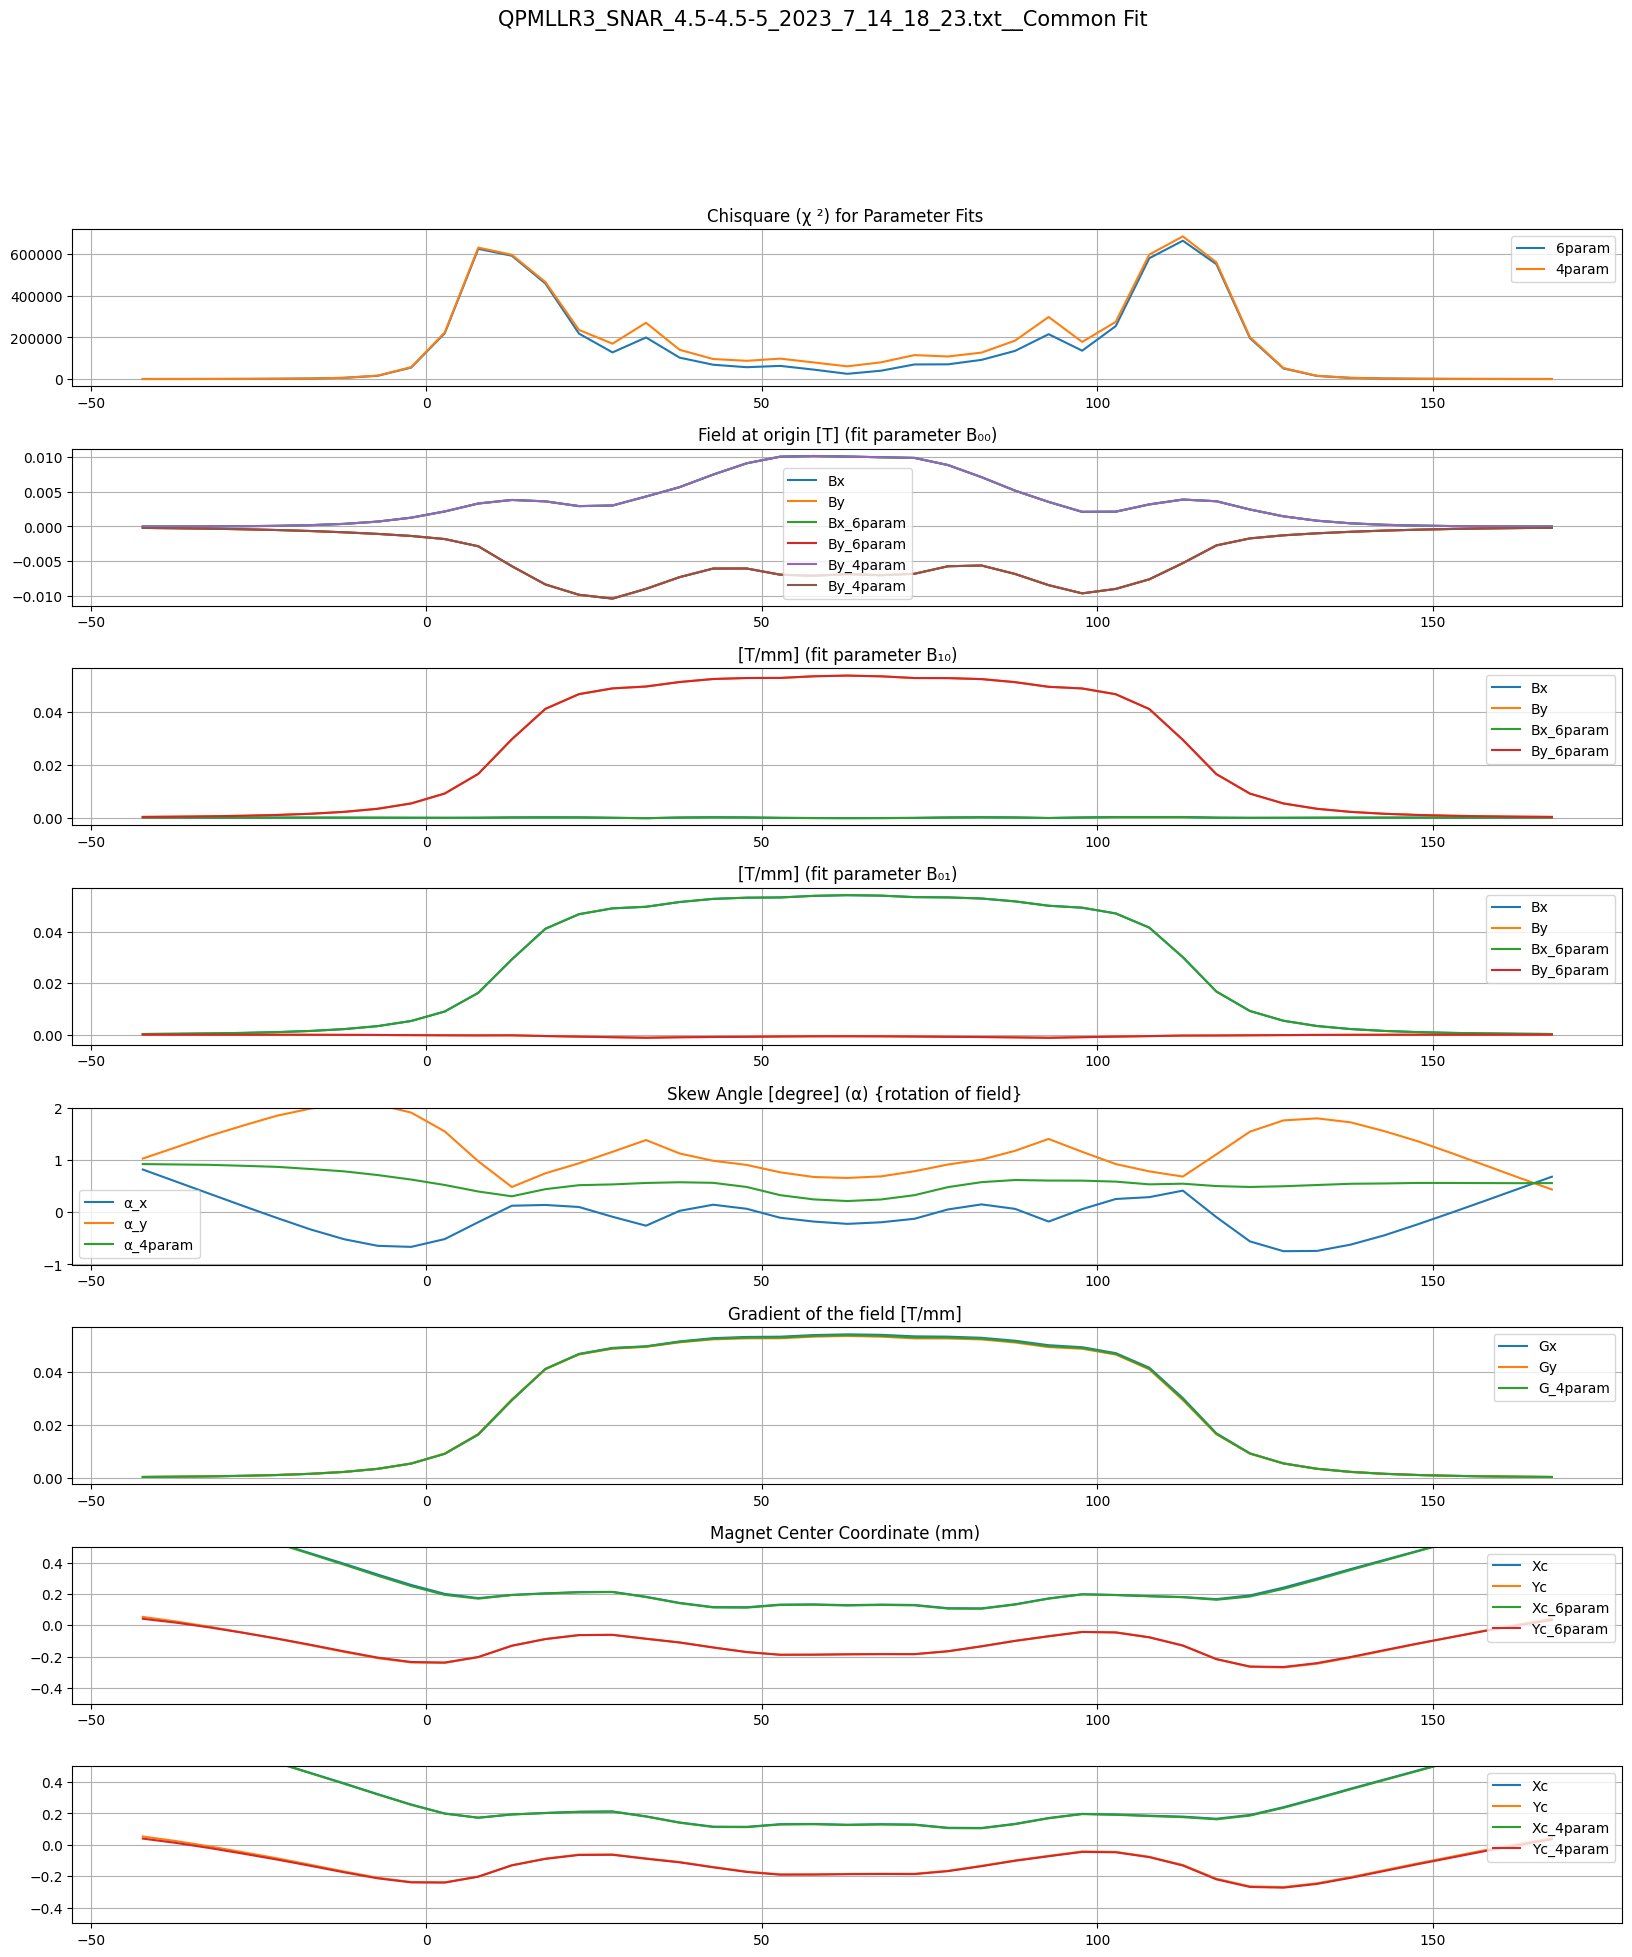

In [5]:
# Plotting each parameters vs Z (6 parameter & 4 parameter fit)

plt.figure(figsize=(20,22))
row = 8; col =1
plt.subplots_adjust(hspace =.4)
plt.suptitle("{}__Common Fit".format(datafile), fontsize = 15)

plt.subplot(row,col,1)
plt.plot(z_local_val,chisq_6param,'-',label='6param')
plt.plot(z_local_val,chisq_4param,'-',label='4param')
#plt.ylim(-.1,1e6)
plt.title('Chisquare (\u03C7 \u00b2) for Parameter Fits ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,2)
plt.plot(z_local_val,Bx_00,'-',label='Bx')
plt.plot(z_local_val,By_00,'-',label='By')
plt.plot(z_local_val,Bx_00_6simult,'-',label='Bx_6param')
plt.plot(z_local_val,By_00_6simult,'-',label='By_6param')
plt.plot(z_local_val,Bx_00_4simult,'-',label='By_4param')
plt.plot(z_local_val,By_00_4simult,'-',label='By_4param')
#plt.ylim(-0.05,+0.05)
plt.title('Field at origin [T] (fit parameter B\u2080\u2080)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,3)
plt.plot(z_local_val,Bx_10,'-',label='Bx')
plt.plot(z_local_val,By_10,'-',label='By')
plt.plot(z_local_val,Bx_10_6simult,'-',label='Bx_6param')
plt.plot(z_local_val,By_10_6simult,'-',label='By_6param')
#plt.ylim(-0.1,0.01)
plt.title('[T/mm] (fit parameter B\u2081\u2080)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,4)
plt.plot(z_local_val,Bx_01,'-',label='Bx')
plt.plot(z_local_val,By_01,'-',label='By')
plt.plot(z_local_val,Bx_01_6simult,'-',label='Bx_6param')
plt.plot(z_local_val,By_01_6simult,'-',label='By_6param')
#plt.ylim(-0.1,0.01)
plt.title('[T/mm] (fit parameter B\u2080\u2081)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,5)
plt.plot(z_local_val,alpha_x,'-',label='\u03B1_x')
plt.plot(z_local_val,alpha_y,'-',label='\u03B1_y')
plt.plot(z_local_val,alpha_4simult,'-',label='\u03B1_4param')
plt.ylim(-1,2)
plt.title('Skew Angle [degree] (\u03B1) {rotation of field} ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,6)
plt.plot(z_local_val,G_x,'-',label='Gx')
plt.plot(z_local_val,G_y,'-',label='Gy')
plt.plot(z_local_val,G_4simult,'-',label='G_4param')
#plt.ylim(-0.025,0.01)
plt.title('Gradient of the field [T/mm] ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,7)
plt.plot(z_local_val,magcentre_x,'-',label='Xc')
plt.plot(z_local_val,magcentre_y,'-',label='Yc')
plt.plot(z_local_val,magcentre_x_6simult,'-',label='Xc_6param')
plt.plot(z_local_val,magcentre_y_6simult,'-',label='Yc_6param')
plt.ylim(-.5,.5)
plt.title('Magnet Center Coordinate (mm) ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,8)
plt.plot(z_local_val,magcentre_x,'-',label='Xc')
plt.plot(z_local_val,magcentre_y,'-',label='Yc')
plt.plot(z_local_val,magcentre_x_4simult,'-',label='Xc_4param')
plt.plot(z_local_val,magcentre_y_4simult,'-',label='Yc_4param')
plt.ylim(-.5,.5)
plt.legend(loc='best')
plt.grid()

plot_3='{}__Common Fit.pdf'.format(datafile)
save_fig(plot_3)



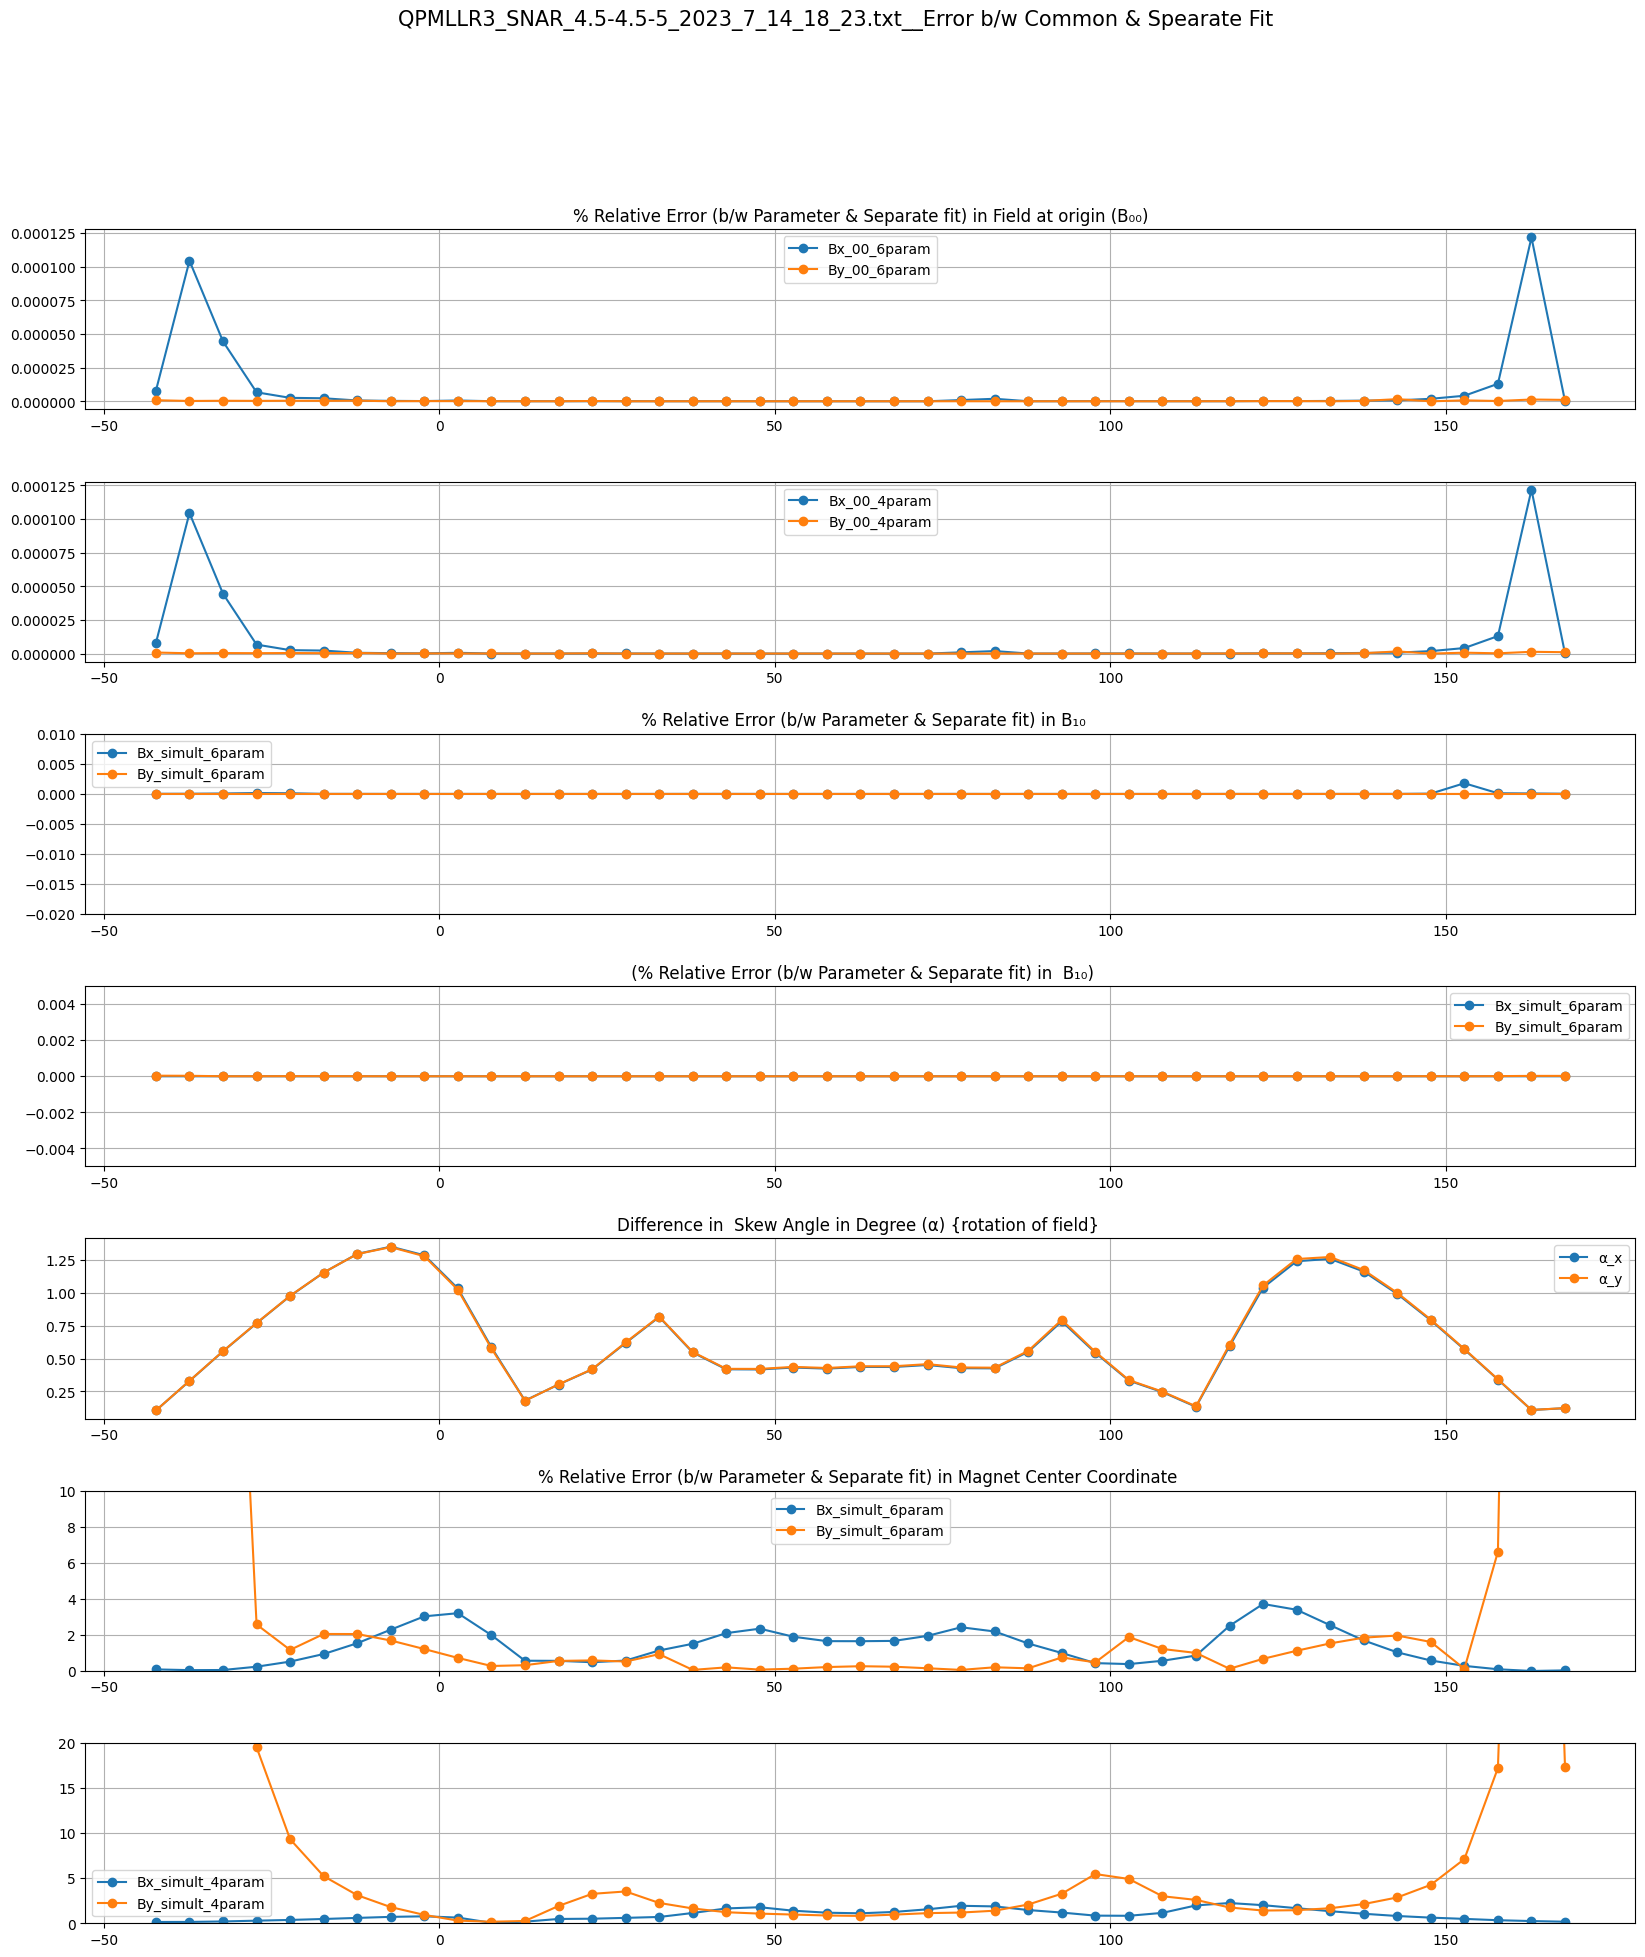

In [6]:
#--------------------------------- Error b/w Common fit & Separate fit

plt.figure(figsize=(20,22))
row = 7; col =1
plt.subplots_adjust(hspace =.4)
plt.suptitle("{}__Error b/w Common & Spearate Fit".format(datafile), fontsize = 15)

# -----------Relative error in fit parameter B_00 

err_Bx_00_6simult=abs((np.array(Bx_00_6simult)/np.array(Bx_00))-1)*100 #for 6 param fit
err_By_00_6simult=abs((np.array(By_00_6simult)/np.array(By_00))-1)*100 #for 6 param fit

err_Bx_00_4simult=abs((np.array(Bx_00_4simult)/np.array(Bx_00))-1)*100 #for 4 param fit
err_By_00_4simult=abs((np.array(By_00_4simult)/np.array(By_00))-1)*100 #for 4 param fit

plt.subplot(row,col,1)
plt.plot(z_local_val,err_Bx_00_6simult,'o-',label='Bx_00_6param')
plt.plot(z_local_val,err_By_00_6simult,'o-',label='By_00_6param')
#plt.ylim(0.0,2e-6)
plt.title('% Relative Error (b/w Parameter & Separate fit) in Field at origin (B\u2080\u2080)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,2)
plt.plot(z_local_val,err_Bx_00_4simult,'o-',label='Bx_00_4param')
plt.plot(z_local_val,err_By_00_4simult,'o-',label='By_00_4param')
plt.legend(loc='best')
#plt.ylim(-0.05,0.05)
plt.grid()

#------------------ Relative Error in fit parameter B_10 for 6 param fit

err_Bx_10_6simult=abs((np.array(Bx_10_6simult)/np.array(Bx_10))-1)*100
err_By_10_6simult=abs((np.array(By_10_6simult)/np.array(By_10))-1)*100

plt.subplot(row,col,3)
plt.plot(z_local_val,err_Bx_10_6simult,'o-',label='Bx_simult_6param')
plt.plot(z_local_val,err_By_10_6simult,'o-',label='By_simult_6param')
plt.ylim(-0.02,0.01)
plt.title(' % Relative Error (b/w Parameter & Separate fit) in B\u2081\u2080')
plt.legend(loc='best')
plt.grid()

#------------------ Relative Error in fit parameter B_01 for 6 param fit

err_Bx_01_6simult=abs((np.array(Bx_01_6simult)/np.array(Bx_01))-1)*100
err_By_01_6simult=abs((np.array(By_01_6simult)/np.array(By_01))-1)*100

plt.subplot(row,col,4)
plt.plot(z_local_val,err_Bx_01_6simult,'o-',label='Bx_simult_6param')
plt.plot(z_local_val,err_By_01_6simult,'o-',label='By_simult_6param')
plt.ylim(-0.005,0.005)
plt.title(' (% Relative Error (b/w Parameter & Separate fit) in  B\u2081\u2080)')
plt.legend(loc='best')
plt.grid()

#------------------ Relative Error in Skew Angle

err_alpha_x=abs((np.array(alpha_4simult)-np.array(alpha_x)))
err_alpha_y=abs((np.array(alpha_4simult)-np.array(alpha_y)))

plt.subplot(row,col,5)
plt.plot(z_local_val,err_alpha_x,'o-',label='\u03B1_x')
plt.plot(z_local_val,err_alpha_y,'o-',label='\u03B1_y')
#plt.ylim(0,10)
plt.title('Difference in  Skew Angle in Degree (\u03B1) {rotation of field} ')
plt.legend(loc='best')
plt.grid()

#------------------ Relative Error in Magnetic Centre Calculation

err_magcentre_x_6simult=abs((np.array(magcentre_x_6simult)/np.array(magcentre_x))-1)*100 #for 6 param fit
err_magcentre_y_6simult=abs((np.array(magcentre_y_6simult)/np.array(magcentre_y))-1)*100 #for 6 param fit

err_magcentre_x_4simult=abs((np.array(magcentre_x_4simult)/np.array(magcentre_x))-1)*100 #for 4 param fit
err_magcentre_y_4simult=abs((np.array(magcentre_y_4simult)/np.array(magcentre_y))-1)*100 #for 4 param fit

plt.subplot(row,col,6)
plt.plot(z_local_val,err_magcentre_x_6simult,'o-',label='Bx_simult_6param')
plt.plot(z_local_val,err_magcentre_y_6simult,'o-',label='By_simult_6param')
plt.ylim(0,10)
plt.title('% Relative Error (b/w Parameter & Separate fit) in Magnet Center Coordinate ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,7)
plt.plot(z_local_val,err_magcentre_x_4simult,'o-',label='Bx_simult_4param')
plt.plot(z_local_val,err_magcentre_y_4simult,'o-',label='By_simult_4param')
plt.ylim(0,20)
plt.legend(loc='best')
plt.grid()

plot_4='{}__Error bw Common & Spearate Fit.pdf'.format(datafile)
save_fig(plot_4)


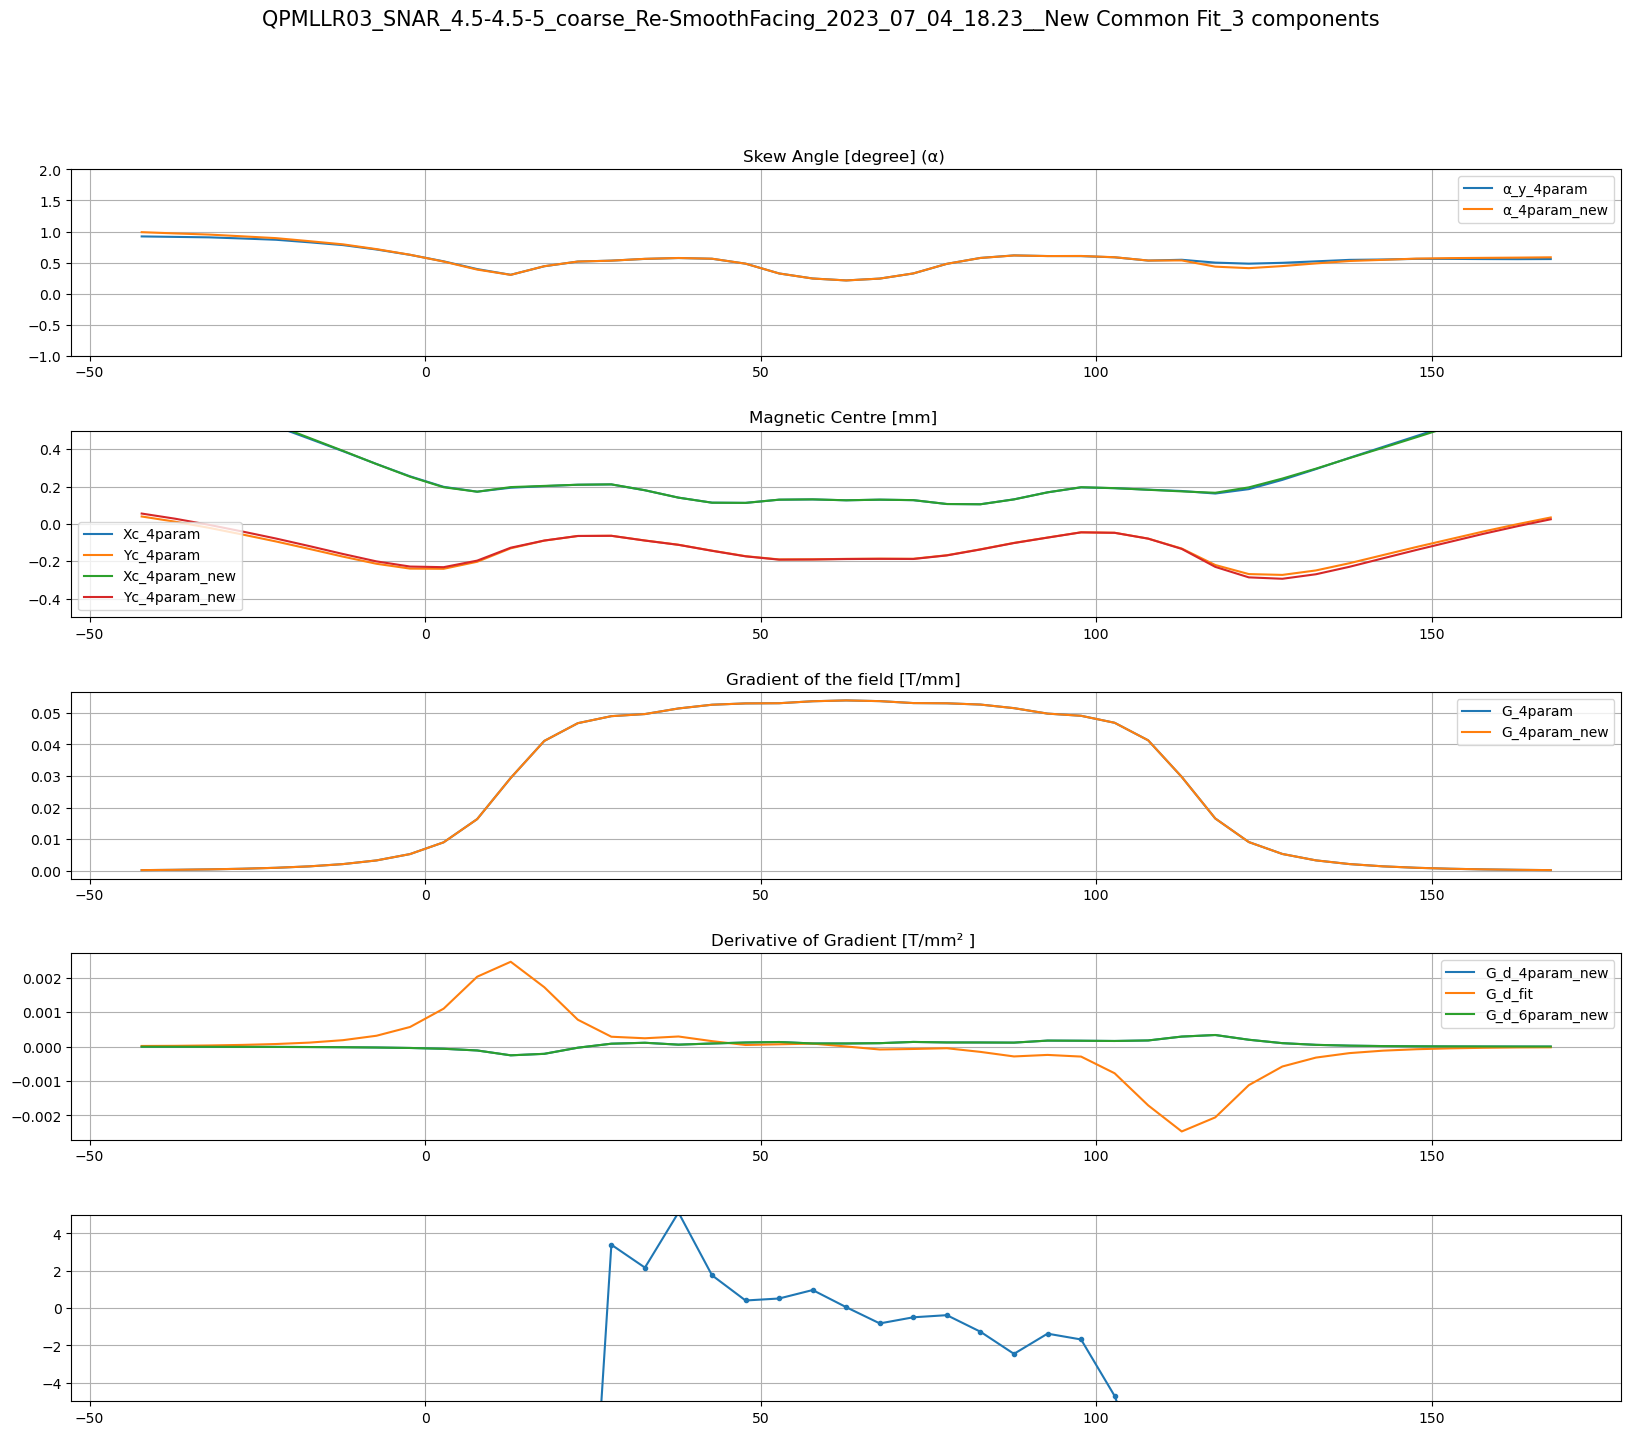

In [71]:
#---------------New 6 parameter Common Fit (all 3 components) 
# Here, we follow the all same steps as common fit but with added z-component in it

from scipy.optimize import least_squares

magcentre_x_6simult_1,magcentre_y_6simult_1,Bx_10_6simult_1,Bx_01_6simult_1,By_10_6simult_1,By_01_6simult_1,G_d_6simult_1 = [],[],[],[],[],[],[]

def simult_fit_6_1(X):
    G_d,Bx_10, Bx_01,By_10, By_01, Xc, Yc = X
    return np.array([ z1-(Bx_10*(x1-Xc) + Bx_01*(y1-Yc)) ,
                     w1-(By_10*(x1-Xc) + By_01*(y1-Yc)) ,
                    u1 - (G_d*(x1-Xc)*(y1-Yc))]).flatten()

guess_initial_1=np.array([0.002,0,-0.1,-0.1,0,0,0]) #----------->assumed from graph plotted earlier


for i in range(0,step): #followed same steps as earlier
    x1 = np.array(x_local_Z[i])
    y1 = np.array(y_local_Z[i])
    z1 = np.array(Bx_Z[i])
    w1 = np.array(By_Z[i])
    u1 = np.array(Bz_Z[i])
    res_4 = least_squares(simult_fit_6_1,guess_initial_1)
    #print(res_1.x)
    G_d_6simult_1.append(res_4.x[0])
    Bx_10_6simult_1.append(res_4.x[1])
    Bx_01_6simult_1.append(res_4.x[2])
    By_10_6simult_1.append(res_4.x[3])
    By_01_6simult_1.append(res_4.x[4])
    magcentre_x_6simult_1.append(res_4.x[5])
    magcentre_y_6simult_1.append(res_4.x[6])
    


#---------------New 4 parameter Common Fit (all 3 components) 

magcentre_x_4simult_1,magcentre_y_4simult_1,G_4simult_1,G_d_4simult_1,alpha_4simult_1=[],[],[],[],[]
chisq_4param_1 =[]
ratio_1=[]
G_d_fit =[]

def simult_fit_4_1(X): #followed same steps as earlier
    xc, yc, G, G_d, alpha = X
    return np.array([ z1-((G*(np.sin(alpha)))*(x1-xc) + (G*(np.cos(alpha)))*(y1-yc)) ,
                     w1-((G*(np.cos(alpha)))*(x1-xc) - (G*(np.sin(alpha)))*(y1-yc)),
                    u1-(G_d*(np.cos(2*alpha)*((x1-xc)*(y1-yc)) + 0.5*np.sin(2*alpha)*((x1-xc)**2 - (y1-yc)**2)))]).flatten()

guess_initial=np.array([0.0,0.0,-0.05,0.5,-0.005])

for i in range(0,step):
    x1 = np.array(x_local_Z[i])
    y1 = np.array(y_local_Z[i])
    z1 = np.array(Bx_Z[i])
    w1 = np.array(By_Z[i])
    u1 = np.array(Bz_Z[i])
    res_3 = least_squares(simult_fit_4_1,guess_initial)
    #print(res_3.x)
    magcentre_x_4simult_1.append(res_3.x[0])
    magcentre_y_4simult_1.append(res_3.x[1])
    G_4simult_1.append(res_3.x[2])
    G_d_4simult_1.append(res_3.x[3])
    alpha_4simult_1.append(res_3.x[4]*57.29)
    
#calculating numerical derivative of G using Centered Difference Method

del_z = z_local_val[1]-z_local_val[0] #defined delta z
#for the first point
G_d_fit.append((G_4simult_1[1]-G_4simult_1[0])/(del_z)) # calculating derivative for the first point
for i in range(1,step-1):
    cc = (G_4simult_1[i+1]-G_4simult_1[i-1])/(2*del_z) # calculating numerical derivative
    G_d_fit.append(cc)
#for the last point
G_d_fit.append((G_4simult_1[step-1]-G_4simult_1[step-2])/(del_z)) # calculating derivative for the last point

for i in range(0,step):
    ratio_1.append((G_d_fit[i])/(G_d_4simult_1[i])) #checking ration for comparision b/e fit G' & calculated G' value

############## Plotting for the comparision b/w earlier common fit & new common fit (with 3 components)

# Plotting each parameters vs Z (6 parameter & 4 parameter fit)

plt.figure(figsize=(20,16))
row = 5; col =1
plt.subplots_adjust(hspace =.4)
plt.suptitle("{}__New Common Fit_3 components".format(datafile), fontsize = 15)

plt.subplot(row,col,1)
plt.plot(z_local_val,alpha_4simult,'-',label='\u03B1_y_4param')
plt.plot(z_local_val,alpha_4simult_1,'-',label='\u03B1_4param_new')
plt.ylim(-1,2)
plt.title('Skew Angle [degree] (\u03B1) ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,2)
plt.plot(z_local_val,magcentre_x_4simult,'-',label='Xc_4param')
plt.plot(z_local_val,magcentre_y_4simult,'-',label='Yc_4param')
plt.plot(z_local_val,magcentre_x_4simult_1,'-',label='Xc_4param_new')
plt.plot(z_local_val,magcentre_y_4simult_1,'-',label='Yc_4param_new')
plt.title('Magnetic Centre [mm] ')
plt.ylim(-.5,.5)
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,3)
plt.plot(z_local_val,G_4simult,'-',label='G_4param')
plt.plot(z_local_val,G_4simult_1,'-',label='G_4param_new')
#plt.ylim(-0.025,0.01)
plt.title('Gradient of the field [T/mm] ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,4)
plt.plot(z_local_val,G_d_4simult_1,'-',label='G_d_4param_new')
plt.plot(z_local_val,G_d_fit,'-',label='G_d_fit')
plt.plot(z_local_val,G_d_6simult_1,'-',label='G_d_6param_new')
#plt.ylim(-0.025,0.01)
plt.title('Derivative of Gradient [T/mm\u00b2 ] ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,5)
plt.plot(z_local_val,ratio_1,'.-')
plt.ylim(-5,5)
plt.grid()

plot_3='{}__New Common Fit_3 components.pdf'.format(datafile)
save_fig(plot_3)



 Enter the value of Bore Diameter (mm) = 30
Entry Position [mm] =  11.648595225364577
Exit Position [mm] =  113.96463658735328
Magnetic Length [mm] =  102.31604136198871
Gradient [T/mm] =  0.05234774887564903
From Power Law Fitting : 
Entry Position [mm] =  12.024887606757986
Exit Position [mm] =  113.59507723033288
Magnetic Length [mm] =  101.57018962357489
Gradient [T/mm] =  0.05371999836016304


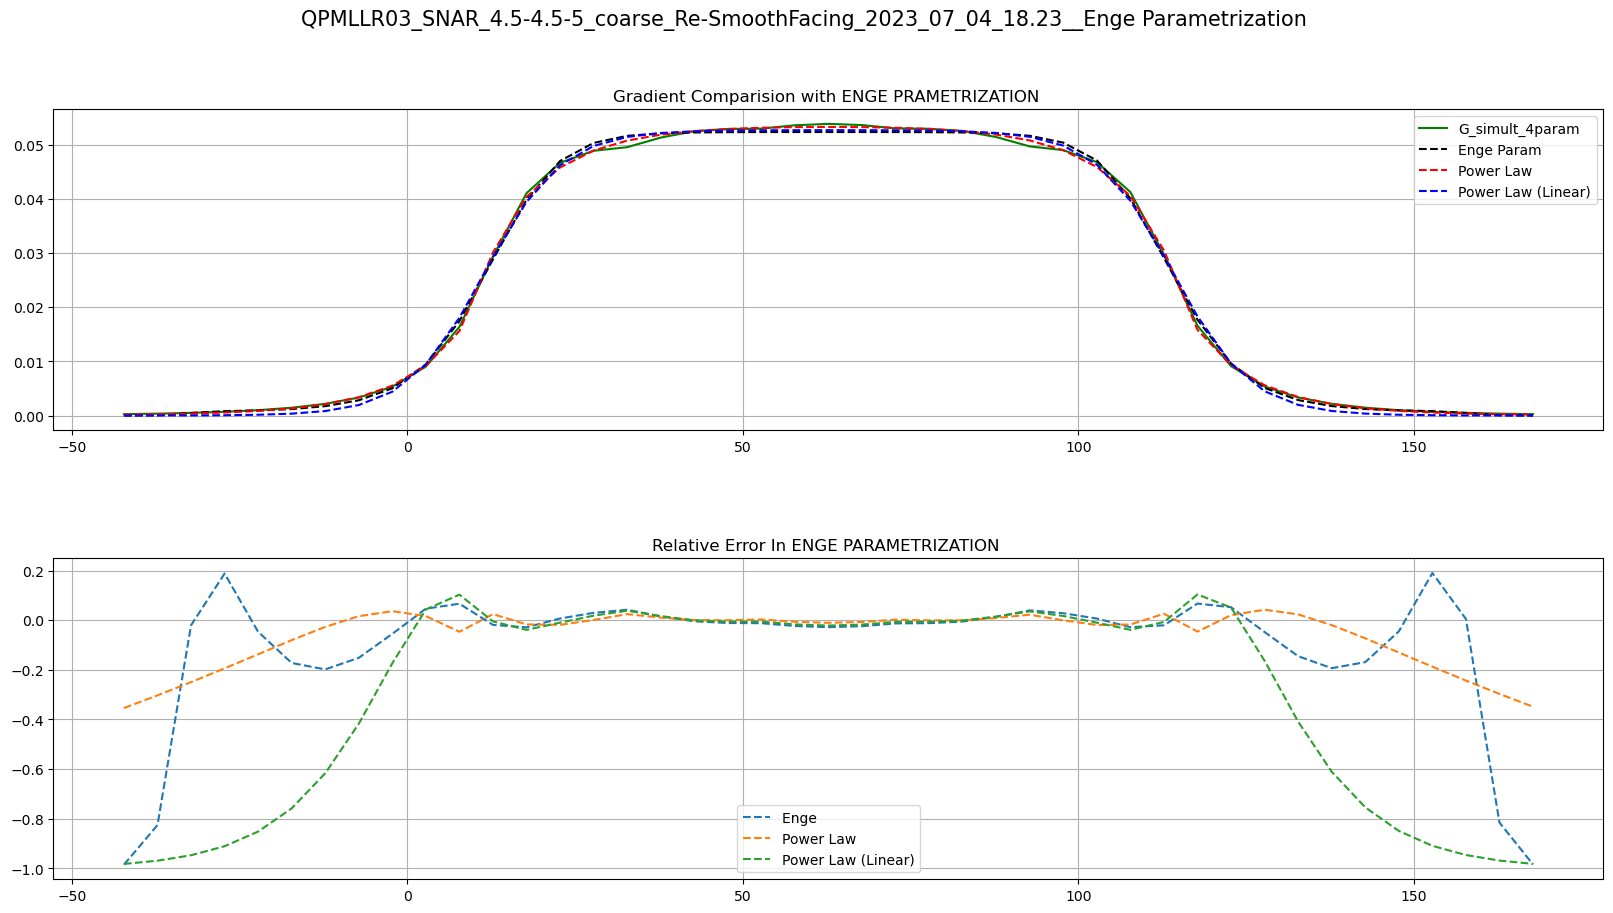

In [72]:
#---------------  Enge-Parametrization for the Gradient


def enge_param(z, zl, zr, G,c1,c2,c3): #Defining the function a/c Enge's Theory (refer to the report)
    def enge_arg(s_d):    
        #s_d = s - s_0
        Pn = c0 + c1*s_d + c2*s_d**2 + c3*s_d**3
        return 1/(1 + np.exp(Pn))
    f1 = enge_arg(-(z-zl)/D)
    f2 = enge_arg((z-zr)/D)
    return G*(f1 * f2)

s_0 = 0 ;c0=0
#c0 = 0; c1 = 4 ; c2 = 0 ; c3 = 0
#zl = 10 ; zr = 115 ; G = 0.054 ; D = 30 #----> for PQMLLR03 - 30mm

D = float(input(" Enter the value of Bore Diameter (mm) = "))

G_4simult = np.array(G_4simult).flatten() #calling up the value calculated earlier
z_local_val = z_local_val.flatten()

guess_enge = [5,120,0.1,4,1,1]   #Here Guess has to be bit closer or else you will very absurd result

param,pocv=(curve_fit(enge_param, z_local_val,G_4simult,p0=guess_enge)) #fitting enge's function via curvefit
#print(param)

zl = param[0] ; zr = param[1] ; G = param[2] #storing up the parameter values
c1 = param[3]; c2 =param[4]; c3 = param[5]
mag_length = abs(zl-zr)
enge_calc = (enge_param(z_local_val,*param)) #regenerating Gradient func from calculated fit parameters

err_enge = (enge_calc - G_4simult)/G_4simult #error in the calculation of fitting

print("Entry Position [mm] = ",zl); print("Exit Position [mm] = ",zr)
print("Magnetic Length [mm] = ",mag_length);print("Gradient [T/mm] = ",G)


#------------------- Power Law Fitting (alternative) to the Enge's Parametrization

def enge_param_1(z, zl, zr, G,c,q): #defining a power law for fitting gradient
    def enge_arg_1(s_d):    
        #s_d = s - s_0
        Pn = np.sign(s_d)*c*abs(s_d)**q
        return 1/(1 + np.exp(Pn))
    f1 = enge_arg_1(-(z-zl)/D)
    f2 = enge_arg_1((z-zr)/D)
    return G*(f1 * f2)

guess_enge_1 = [5,120,0.1,1,0.5]   #Here Guess has to be bit closer or else you will very absurd result
param_1,pocv_1=(curve_fit(enge_param_1, z_local_val,G_4simult,p0=guess_enge_1))
#print(param_1)

zl_1 = param_1[0] ; zr_1 = param_1[1] ; G_1 = param_1[2]
mag_length_1 = abs(zl_1-zr_1)
enge_calc_1 = (enge_param_1(z_local_val,*param_1))
err_enge_1 = (enge_calc_1 - G_4simult)/G_4simult

print("From Power Law Fitting : ")
print("Entry Position [mm] = ",zl_1); print("Exit Position [mm] = ",zr_1)
print("Magnetic Length [mm] = ",mag_length_1);print("Gradient [T/mm] = ",G_1)

#----------------- Power Law Fitting (Single Coeff -Linear arguement)
def enge_param_2(z, zl, zr, G,c): #defining a linear power law for fitting gradient
    def enge_arg_1(s_d):    
        #s_d = s - s_0
        Pn = np.sign(s_d)*c*abs(s_d)**q
        return 1/(1 + np.exp(Pn))
    f1 = enge_arg_1(-(z-zl)/D)
    f2 = enge_arg_1((z-zr)/D)
    return G*(f1 * f2)

q=1 ; guess_enge_2 = [5,120,0.1,1]   #Here Guess has to be bit closer or else you will very absurd result
param_2,pocv_2=(curve_fit(enge_param_2, z_local_val,G_4simult,p0=guess_enge_2))
#print(param_2)

zl_2 = param_2[0] ; zr_2 = param_2[1] ; G_2 = param_2[2]
mag_length_2 = abs(zl_2-zr_2)
enge_calc_2 = (enge_param_2(z_local_val,*param_2))
err_enge_2 = (enge_calc_2 - G_4simult)/G_4simult

#plotting all fit function

plt.figure(figsize=(20,10))
row = 2; col =1
plt.subplots_adjust(hspace =.4)
plt.suptitle("{}__Enge Parametrization".format(datafile), fontsize = 15)

plt.subplot(row,col,1)
plt.plot(z_local_val,G_4simult,'-g',label='G_simult_4param')
plt.plot(z_local_val,enge_calc,'--k',label='Enge Param')
plt.plot(z_local_val,enge_calc_1,'--r',label='Power Law')
plt.plot(z_local_val,enge_calc_2,'--b',label='Power Law (Linear)')
#plt.ylim(-0.025,0.01)
plt.title('Gradient Comparision with ENGE PRAMETRIZATION ')   
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,2)
plt.plot(z_local_val,err_enge,'--',label='Enge ')
plt.plot(z_local_val,err_enge_1,'--',label='Power Law ')
plt.plot(z_local_val,err_enge_2,'--',label='Power Law (Linear)')
#plt.ylim(-0.025,0.01)
plt.title('Relative Error In ENGE PARAMETRIZATION ')   
plt.legend(loc='best')
plt.grid()

plot_4='{}__Enge Parametrization.pdf'.format(datafile)
save_fig(plot_4)


In [73]:
#-------------------------- Non-linear Fitting (upto Octupole term) - 2D Taylor Expansion

from scipy.optimize import curve_fit

def nonlin_fit_func(X, B_00, B_10, B_01, B_20, B_11, B_02, B_30, B_21, B_12, B_03): #fitting function
    x,y = X
    quad_term = B_00 + B_10*x + B_01*y 
    sext_term = B_20*pow(x,2)*pow(y,0) + B_11*pow(x,1)*pow(y,1) + B_02*pow(x,0)*pow(y,2)
    octo_term = B_30*pow(x,3)*pow(y,0) + B_21*pow(x,2)*pow(y,1) + B_12*pow(x,1)*pow(y,2) + B_03*pow(x,0)*pow(y,3)  
    return quad_term + sext_term + octo_term

param_X_nonlin,param_Y_nonlin,chisq_x_nonlin,chisq_y_nonlin=[],[],[],[]

x = np.array(x_local_Z) # this is of 19x53 order matrix
y = np.array(y_local_Z) # this is of 19x53 order matrix
z1 = np.array(Bx_Z)     # this is of 19x53 order matrix
z2 = np.array(By_Z)    # this is of 19x53 order matrix

#fitting done by curvefit (each component separately)
for i in range(step):
    param1,pocv1=(curve_fit(nonlin_fit_func, (x[i],y[i]), z1[i])) #for Bx components
    param_X_nonlin.append(param1)
    #print(param1[0:3]) #------------------ Coeff of Quadrupole
    #print(param1[4:7]) #------------------ Coeff of Sextupole
    #print(param1[7:10])#------------------ Coeff of Octupole
    
    fit_val= nonlin_fit_func((x[i],y[i]),*param1)
    err=1e-4
    chisqr1=np.sum(((z1[i]-fit_val)/err)**2) #chisquare sum
    chisq_x_nonlin.append(chisqr1)
    
    param2,pocv2=(curve_fit(nonlin_fit_func, (x[i],y[i]), z2[i])) #for By components
    param_Y_nonlin.append(param2)
    
    fit_val= nonlin_fit_func((x[i],y[i]),*param2)
    err=1e-4
    chisqr2=np.sum(((z2[i]-fit_val)/err)**2) #chisquare sum
    chisq_y_nonlin.append(chisqr2)
    
param_X_nonlin=np.array(param_X_nonlin) #converting list into arrays 
param_Y_nonlin=np.array(param_Y_nonlin)

Bx_00_nonlin = param_X_nonlin[0:,0]; By_00_nonlin = param_Y_nonlin[0:,0]
Bx_10_nonlin = param_X_nonlin[0:,1]; By_10_nonlin = param_Y_nonlin[0:,1]
Bx_01_nonlin = param_X_nonlin[0:,2]; By_01_nonlin = param_Y_nonlin[0:,2]
Bx_20_nonlin = param_X_nonlin[0:,3]; By_20_nonlin = param_Y_nonlin[0:,3]
Bx_11_nonlin = param_X_nonlin[0:,4]; By_11_nonlin = param_Y_nonlin[0:,4]
Bx_02_nonlin = param_X_nonlin[0:,5]; By_02_nonlin = param_Y_nonlin[0:,5]
Bx_30_nonlin = param_X_nonlin[0:,6]; By_30_nonlin = param_Y_nonlin[0:,6]
Bx_21_nonlin = param_X_nonlin[0:,7]; By_21_nonlin = param_Y_nonlin[0:,7]
Bx_12_nonlin = param_X_nonlin[0:,8]; By_12_nonlin = param_Y_nonlin[0:,8]
Bx_03_nonlin = param_X_nonlin[0:,9]; By_03_nonlin = param_Y_nonlin[0:,9]

#checking for the ratio between different coefficient of sextupole & octupole term
# To verify whether they follow the same numerical co-relation from the Multipole Expansion

sext_ratio_1 = Bx_20_nonlin/Bx_02_nonlin # value should be -1
sext_ratio_2 = By_11_nonlin/Bx_20_nonlin # value should be -2
sext_ratio_3 = By_20_nonlin/By_02_nonlin # value should be -1
sext_ratio_4 = Bx_11_nonlin/By_20_nonlin # value should be -2
#print((sext_ratio_4))

oct_ratio_1 = Bx_30_nonlin/By_03_nonlin # value should be +1
oct_ratio_2 = (Bx_12_nonlin/Bx_30_nonlin) # value should be -3
oct_ratio_3 = (By_21_nonlin/Bx_30_nonlin) # value should be -3
oct_ratio_4 = -1*(By_30_nonlin/By_03_nonlin) # value should be +1
oct_ratio_5 = -1*(Bx_21_nonlin/By_30_nonlin) # value should be -3
oct_ratio_6 = (By_12_nonlin/By_30_nonlin) # value should be -3
#print(oct_ratio_5)


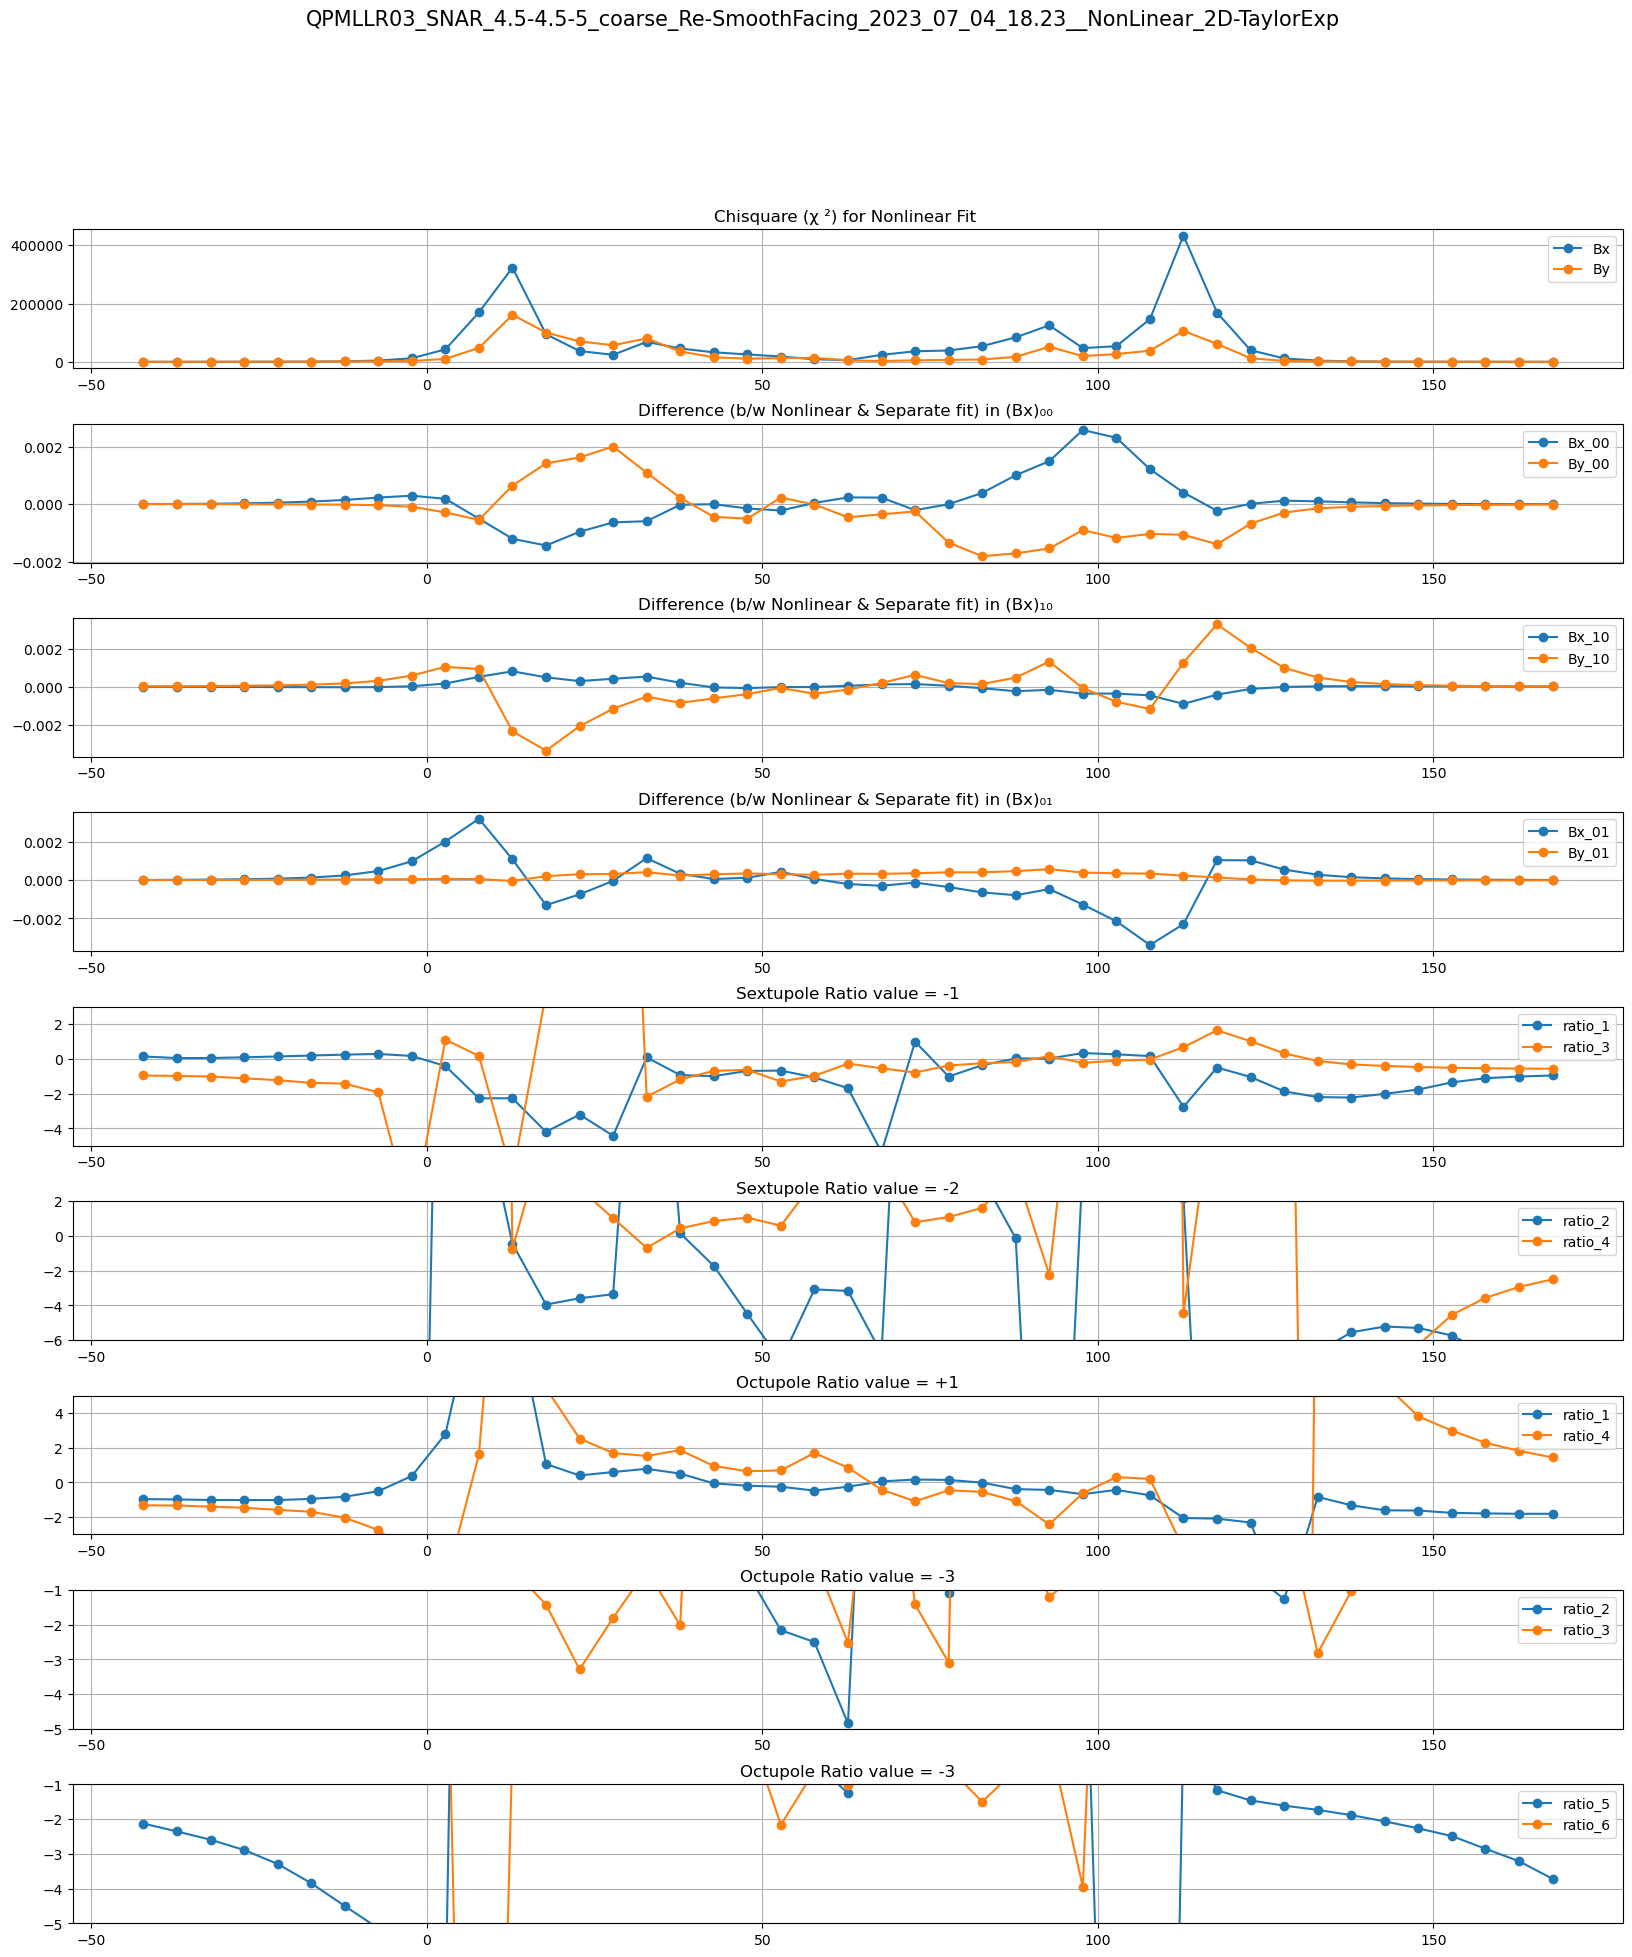

In [74]:
#plotting the ratio & difference between the coefficients

plt.figure(figsize=(20,22))
row = 9; col =1
plt.subplots_adjust(hspace =.4)
plt.suptitle("{}__NonLinear_2D-TaylorExp".format(datafile), fontsize = 15)

plt.subplot(row,col,1)
plt.plot(z_local_val,chisq_x_nonlin,'o-',label='Bx')
plt.plot(z_local_val,chisq_y_nonlin,'o-',label='By')
#plt.ylim(-.1,.1)
plt.title('Chisquare (\u03C7 \u00b2) for Nonlinear Fit ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,2)
plt.plot(z_local_val,Bx_00_nonlin-Bx_00,'o-',label='Bx_00')
plt.plot(z_local_val,By_00_nonlin-By_00,'o-',label='By_00')
#plt.ylim(-.2,.3)
plt.title('Difference (b/w Nonlinear & Separate fit) in (Bx)\u2080\u2080 ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,3)
plt.plot(z_local_val,Bx_10_nonlin-Bx_10,'o-',label='Bx_10')
plt.plot(z_local_val,By_10_nonlin-By_10,'o-',label='By_10')
#plt.ylim(-.2,.3)
plt.title('Difference (b/w Nonlinear & Separate fit) in (Bx)\u2081\u2080 ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,4)
plt.plot(z_local_val,Bx_01_nonlin-Bx_01,'o-',label='Bx_01')
plt.plot(z_local_val,By_01_nonlin-By_01,'o-',label='By_01')
#plt.ylim(-.2,.3)
plt.title('Difference (b/w Nonlinear & Separate fit) in (Bx)\u2080\u2081 ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,5)
plt.plot(z_local_val,sext_ratio_1,'o-',label='ratio_1')
plt.plot(z_local_val,sext_ratio_3,'o-',label='ratio_3')
plt.ylim(-5,3)
plt.title('Sextupole Ratio value = -1')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,6)
plt.plot(z_local_val,sext_ratio_2,'o-',label='ratio_2')
plt.plot(z_local_val,sext_ratio_4,'o-',label='ratio_4')
plt.ylim(-6,2)
plt.title('Sextupole Ratio value = -2')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,7)
plt.plot(z_local_val,oct_ratio_1,'o-',label='ratio_1')
plt.plot(z_local_val,oct_ratio_4,'o-',label='ratio_4')
plt.ylim(-3,5)
plt.title('Octupole Ratio value = +1')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,8)
plt.plot(z_local_val,oct_ratio_2,'o-',label='ratio_2')
plt.plot(z_local_val,oct_ratio_3,'o-',label='ratio_3')
plt.ylim(-5,-1)
plt.title('Octupole Ratio value = -3')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,9)
plt.plot(z_local_val,oct_ratio_5,'o-',label='ratio_5')
plt.plot(z_local_val,oct_ratio_6,'o-',label='ratio_6')
plt.ylim(-5,-1)
plt.title('Octupole Ratio value = -3')
plt.legend(loc='best')
plt.grid()

plot_5='{}__NonLinear_2D-TaylorExp.pdf'.format(datafile)
save_fig(plot_5)



In [75]:
# Ad-Hoc formulation of the fitting equation - commented due to its absurd behaviour

# New Non-Linear fit 2 (Xc, Yc, G, S, O, alpha_Q, alpha_S, alpha_O ) 
'''

def new_nonlin_fit_2x(X, Yc, G, S, O, alpha_Q, alpha_S, alpha_O):
    x1,y1 = X
    qp1 = G*((np.sin(alpha_Q)*(x1)) + (np.cos(alpha_Q)*(y1-Yc)))
    sp1 = S*((np.cos(alpha_S)**2*(x1)**2) + (np.cos(alpha_S)*np.sin(alpha_S)*x1*(y1-Yc))+(np.sin(alpha_S)**2*(y1-Yc)**2))
    op1 = O*((np.cos(alpha_O)**3*(x1)**3) + (np.cos(alpha_O)**2*np.sin(alpha_O)*x1**2*(y1-Yc)) + 
            (np.cos(alpha_O)*np.sin(alpha_O)**2*x1*(y1-Yc)**2) + (np.sin(alpha_S)**3*(y1-Yc)**3)) 
    return  (qp1 + sp1 + op1)

def new_nonlin_fit_2y(X, Xc, G, S, O, alpha_Q, alpha_S, alpha_O):
    x1,y1 = X
    qp1 = G*((np.sin(alpha_Q)*(x1-Xc)) + (np.cos(alpha_Q)*(y1)))
    sp1 = S*((np.cos(alpha_S)**2*(x1-Xc)**2) + (np.cos(alpha_S)*np.sin(alpha_S)*(x1-Xc)*(y1))+(np.sin(alpha_S)**2*(y1)**2))
    op1 = O*((np.cos(alpha_O)**3*(x1-Xc)**3) + (np.cos(alpha_O)**2*np.sin(alpha_O)*(x1-Xc)**2*(y1)) + 
            (np.cos(alpha_O)*np.sin(alpha_O)**2*(x1-Xc)*(y1)**2) + (np.sin(alpha_S)**3*(y1)**3)) 
    return  (qp1 + sp1 + op1)

from scipy.optimize import least_squares
def new_nonlin_fit_2(X):
    (Xc,Yc, G, S, O, alpha_Q, alpha_S, alpha_O) = X
    
    qp1 = G*((np.sin(alpha_Q)*(x1-Xc)) + (np.cos(alpha_Q)*(y1-Yc)))
    sp1 = S*((np.cos(alpha_S)**2*(x1-Xc)**2) + (np.cos(alpha_S)*np.sin(alpha_S)*(x1-Xc)*(y1-Yc))+(np.sin(alpha_S)**2*(y1-Yc)**2))
    op1 = O*((np.cos(alpha_O)**3*(x1-Xc)**3) + (np.cos(alpha_O)**2*np.sin(alpha_O)*(x1-Xc)**2*(y1-Yc)) + 
            (np.cos(alpha_O)*np.sin(alpha_O)**2*(x1-Xc)*(y1-Yc)**2) + (np.sin(alpha_S)**3*(y1-Yc)**3)) 
    
    qp2 = G*((np.sin(alpha_Q)*(x1-Xc)) + (np.cos(alpha_Q)*(y1-Yc)))
    sp2 = S*((np.cos(alpha_S)**2*(x1-Xc)**2) + (np.cos(alpha_S)*np.sin(alpha_S)*(x1-Xc)*(y1-Yc))+(np.sin(alpha_S)**2*(y1-Yc)**2))
    op2 = O*((np.cos(alpha_O)**3*(x1-Xc)**3) + (np.cos(alpha_O)**2*np.sin(alpha_O)*(x1-Xc)**2*(y1-Yc)) + 
            (np.cos(alpha_O)*np.sin(alpha_O)**2*(x1-Xc)*(y1-Yc)**2) + (np.sin(alpha_S)**3*(y1-Yc)**3)) 
    
    return np.array([z11- (qp1+sp1+op1),
            z22 - (qp2+sp2+op2)]).flatten()

G*((np.sin(alpha_Q)*(x1-Xc)) + (np.cos(alpha_Q)*(y1-Yc)))
G*((np.sin(alpha_Q)*(x1-Xc)) + (np.cos(alpha_Q)*(y1-Yc)))

param_X_nonlin2,param_Y_nonlin2, param_nonlin2 = [],[],[]

guess_initial_1 = ([0,0,-0.05,0,0.01,0.007,0.001,0.001])
bound = ([[-.1,-.1,-.1,-0.001,-0.01,-0.01,-0.01,-0.01],[.1,.1,.1,0.001,0.01,0.01,0.01,0.01]])
#print(guess_initial_1.shape)
#print(bound.shape)

x = np.array(x_local_Z) # this is of 19x53 order matrix
y = np.array(y_local_Z) # this is of 19x53 order matrix
z1 = np.array(Bx_Z)     # this is of 19x53 order matrix
z2 = np.array(By_Z)    # this is of 19x53 order matrix

for i in range(step):
    #param1,pocv1=(curve_fit(new_nonlin_fit_2x, (x[i],y[i]), z1[i],maxfev=1000000))
    #param_X_nonlin2.append(param1)
    
    #param2,pocv2=(curve_fit(new_nonlin_fit_2y, (x[i],y[i]), z2[i],maxfev=1000000))
    #param_Y_nonlin2.append(param2)
    
    z11= z1[i]; z22= z2[i]; x1=x[i]; y1=y[i]
    res_3 = least_squares(new_nonlin_fit_2,guess_initial_1,bounds=bound)
    param_nonlin2.append(res_3.x)
    
    #zz = np.array([z1[i],z2[i]]).flatten()
    #param3,pocv3=(curve_fit(new_nonlin_fit_2, (x[i],y[i]), zz ,maxfev=1000000))
    #param_nonlin2.append(param3)
    
param_nonlin2 = np.array(param_nonlin2)

param_X_nonlin2 = np.array(param_X_nonlin2)
param_Y_nonlin2 = np.array(param_Y_nonlin2)


alpha_Qx_nonlin2 = (param_X_nonlin2[0:,4]*57.29); alpha_Qy_nonlin2 = (param_Y_nonlin2[0:,4]*57.29)
alpha_Sx_nonlin2 = param_X_nonlin2[0:,5]*57.29; alpha_Sy_nonlin2 = param_Y_nonlin2[0:,5]*57.29
alpha_Ox_nonlin2 = param_X_nonlin2[0:,6]*57.29; alpha_Oy_nonlin2 = param_Y_nonlin2[0:,6]*57.29
Gx_nonlin2 = param_X_nonlin2[0:,1]; Gy_nonlin2 = param_Y_nonlin2[0:,1]; 
Sx_nonlin2 = param_X_nonlin2[0:,2]; Sy_nonlin2 = param_Y_nonlin2[0:,2]
Ox_nonlin2 = param_X_nonlin2[0:,3]; Oy_nonlin2 = param_Y_nonlin2[0:,3]
Yc_nonlin2 = param_X_nonlin2[0:,0]; Xc_nonlin2 = param_Y_nonlin2[0:,0]

Xc_com_nonlin2 = param_nonlin2[0:,0]
Yc_com_nonlin2 = param_nonlin2[0:,1]
G_nonlin2 = param_nonlin2[0:,2]
S_nonlin2 = param_nonlin2[0:,3]
O_nonlin2 = param_nonlin2[0:,4]
alpha_Q_nonlin2 = param_nonlin2[0:,5]*57.29
alpha_S_nonlin2 = param_nonlin2[0:,6]*57.29
alpha_O_nonlin2 = param_nonlin2[0:,7]*57.29
'''

'''
fig31 = plt.figure(figsize=(20,2)) 
#plt.plot(z_local_val,alpha_Qx_nonlin2,'o-',label='alpha_Qx_nonlin2')
#plt.plot(z_local_val,alpha_Qy_nonlin2,'o-',label='alpha_Qy_nonlin2')
plt.plot(z_local_val,alpha_Q_nonlin2,'o-',label='alpha_Q_nonlin2')
#plt.ylim(-1,1)
plt.title('{} alpha_Q value (degree)'.format(datafile))
plt.legend(loc='best')
plt.grid()

fig32 = plt.figure(figsize=(20,2))   
#plt.plot(z_local_val,Gx_nonlin2,'o-',label='Gx_nonlin2')
#plt.plot(z_local_val,Gy_nonlin2,'o-',label='Gy_nonlin2')
plt.plot(z_local_val,G_nonlin2,'o-',label='G_nonlin2')
#plt.ylim(-.1,.1)
plt.title('{} G value (T/mm) '.format(datafile))
plt.legend(loc='best')
plt.grid()

fig33 = plt.figure(figsize=(20,2))   
plt.plot(z_local_val,Xc_nonlin2,'o-',label='Xc_nonlin2')
plt.plot(z_local_val,Yc_nonlin2,'o-',label='Yc_nonlin2')
#plt.ylim(-15,15)
plt.title('{} Magnetic Centre value (mm)'.format(datafile))
plt.legend(loc='best')
plt.grid()

fig34 = plt.figure(figsize=(20,2))   
plt.plot(z_local_val,Xc_com_nonlin2,'o-',label='Xc_nonlin2')
plt.plot(z_local_val,Yc_com_nonlin2,'o-',label='Yc_nonlin2')
#plt.ylim(-1.5,1.5)
plt.title('{} Magnetic Centre From COMMON FIT (mm)'.format(datafile))
plt.legend(loc='best')
plt.grid()


fig35 = plt.figure(figsize=(20,2))   
#plt.plot(z_local_val,alpha_Sx_nonlin2,'o-',label='alpha_Sx_nonlin2')
#plt.plot(z_local_val,alpha_Sy_nonlin2,'o-',label='alpha_Sy_nonlin2')
plt.plot(z_local_val,alpha_S_nonlin2,'o-',label='alpha_S_nonlin2')
#plt.ylim(-1,1)
plt.title('{} alpha_Sextupole value (degree)'.format(datafile))
plt.legend(loc='best')
plt.grid()

fig36 = plt.figure(figsize=(20,2))   
#plt.plot(z_local_val,alpha_Ox_nonlin2,'o-',label='alpha_Ox_nonlin2')
#plt.plot(z_local_val,alpha_Oy_nonlin2,'o-',label='alpha_Oy_nonlin2')
plt.plot(z_local_val,alpha_O_nonlin2,'o-',label='alpha_O_nonlin2')
#plt.ylim(-1,1)
plt.title('{} alpha_Octupole value (degree)'.format(datafile))
plt.legend(loc='best')
plt.grid()

fig37 = plt.figure(figsize=(20,2))   
#plt.plot(z_local_val,Sx_nonlin2,'o-',label='Sx_nonlin2')
#plt.plot(z_local_val,Sy_nonlin2,'o-',label='Sy_nonlin2')
plt.plot(z_local_val,S_nonlin2,'o-',label='S_nonlin2')
#plt.ylim(-1,1)
plt.title('{} Gradient Sextupole value (T/mm\u00b2 )'.format(datafile))
plt.legend(loc='best')
plt.grid()

fig38 = plt.figure(figsize=(20,2))   
#plt.plot(z_local_val,Ox_nonlin2,'o-',label='Ox_nonlin2')
#plt.plot(z_local_val,Oy_nonlin2,'o-',label='Oy_nonlin2')
plt.plot(z_local_val,O_nonlin2,'o-',label='O_nonlin2')
#plt.ylim(-1,1)
plt.title('{} Gradient Octupole value (T/mm\u00b3 )'.format(datafile))
plt.legend(loc='best')
plt.grid()

#plot_7='NonLinear_fit_2 {}.pdf'.format(datafile)
#save_fig(plot_7)
'''


"\nfig31 = plt.figure(figsize=(20,2)) \n#plt.plot(z_local_val,alpha_Qx_nonlin2,'o-',label='alpha_Qx_nonlin2')\n#plt.plot(z_local_val,alpha_Qy_nonlin2,'o-',label='alpha_Qy_nonlin2')\nplt.plot(z_local_val,alpha_Q_nonlin2,'o-',label='alpha_Q_nonlin2')\n#plt.ylim(-1,1)\nplt.title('{} alpha_Q value (degree)'.format(datafile))\nplt.legend(loc='best')\nplt.grid()\n\nfig32 = plt.figure(figsize=(20,2))   \n#plt.plot(z_local_val,Gx_nonlin2,'o-',label='Gx_nonlin2')\n#plt.plot(z_local_val,Gy_nonlin2,'o-',label='Gy_nonlin2')\nplt.plot(z_local_val,G_nonlin2,'o-',label='G_nonlin2')\n#plt.ylim(-.1,.1)\nplt.title('{} G value (T/mm) '.format(datafile))\nplt.legend(loc='best')\nplt.grid()\n\nfig33 = plt.figure(figsize=(20,2))   \nplt.plot(z_local_val,Xc_nonlin2,'o-',label='Xc_nonlin2')\nplt.plot(z_local_val,Yc_nonlin2,'o-',label='Yc_nonlin2')\n#plt.ylim(-15,15)\nplt.title('{} Magnetic Centre value (mm)'.format(datafile))\nplt.legend(loc='best')\nplt.grid()\n\nfig34 = plt.figure(figsize=(20,2))   \nplt.pl

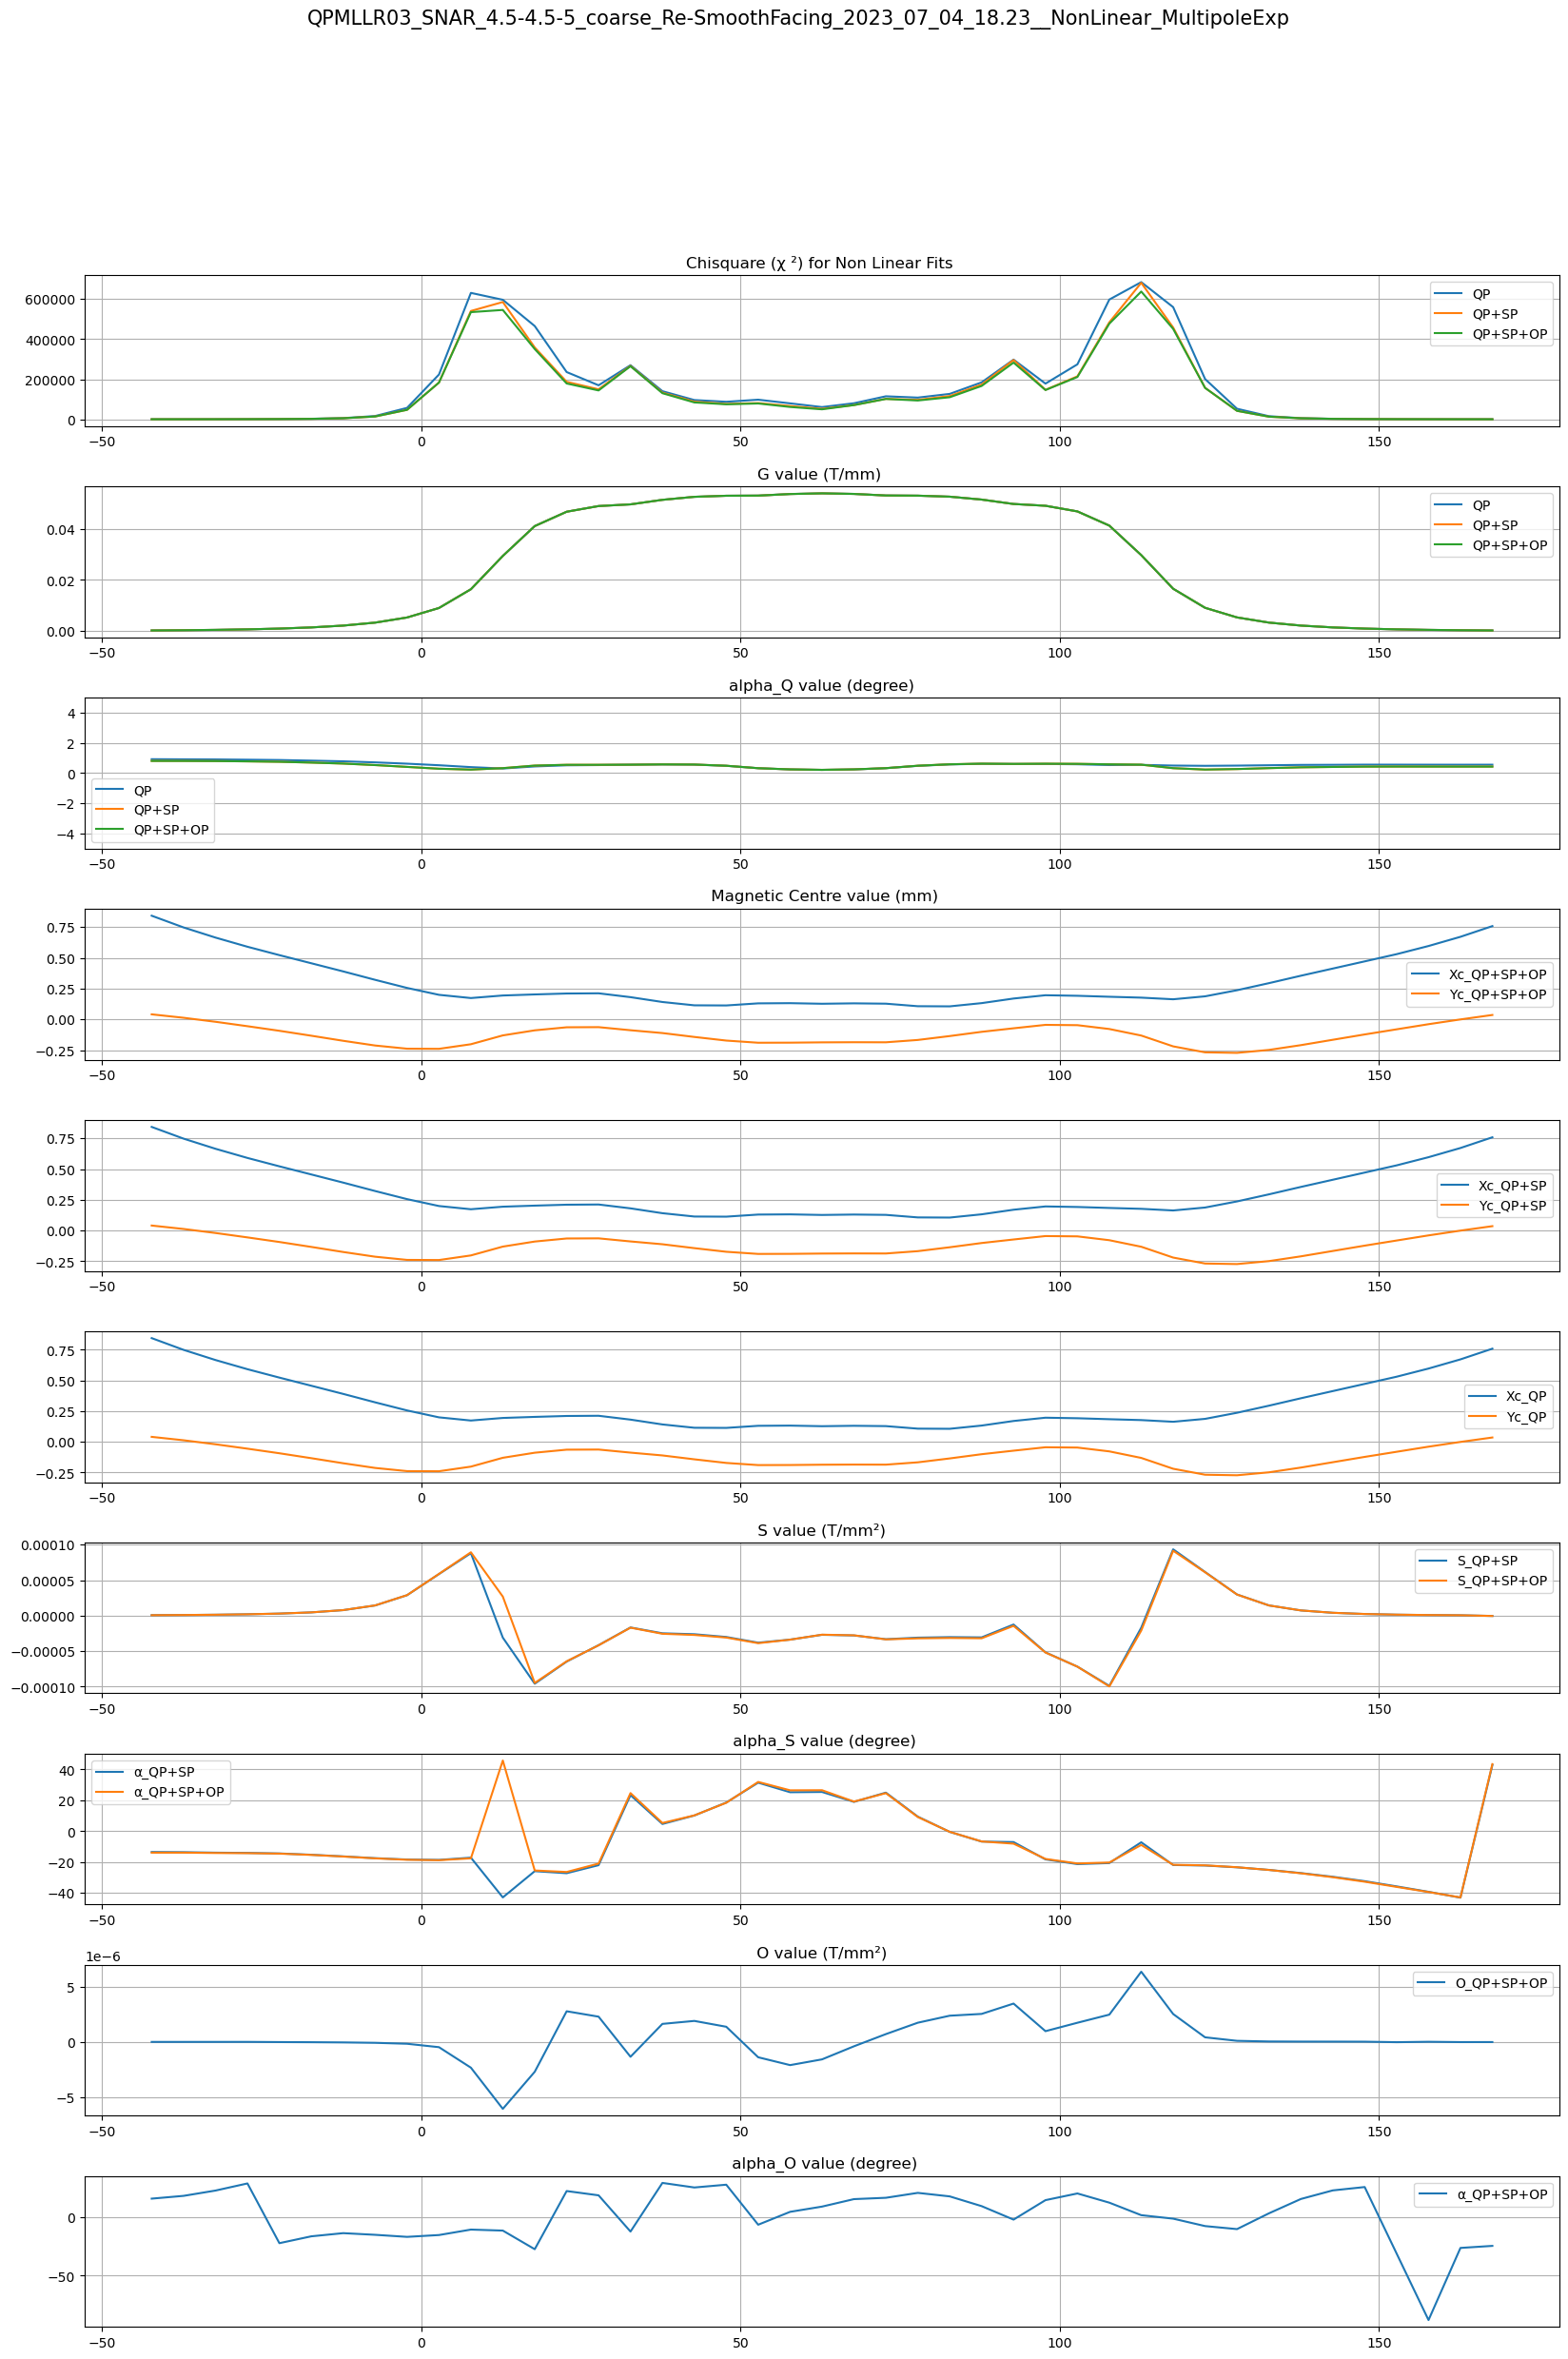

In [76]:
# New Non-Linear fit 3 (Xc, Yc, G, S, O, alpha_Q, alpha_S, alpha_O )
# This fitting is done while keeping coordinate transformation (rotation + translation) in mind

from scipy.optimize import least_squares

x = np.array(x_local_Z) # this is of (step x ___) order matrix
y = np.array(y_local_Z) # this is of (step x ___) order matrix
z1 = np.array(Bx_Z)     # this is of (step x ___) order matrix
z2 = np.array(By_Z)    # this is of (step x ___) order matrix

#----------------------------------------------------------------------------------------
########## Considering only QP terms

def new_nonlin_fit_3_1(t):
    Xc,Yc,G,alpha_Q = t
    
    #coordinate transformaation
    Xq = ((np.cos(alpha_Q)*(x1-Xc)) - (np.sin(alpha_Q)*(y1-Yc))) 
    Yq = ((np.sin(alpha_Q)*(x1-Xc)) + (np.cos(alpha_Q)*(y1-Yc)))

    #------X-Component
    qp1 = G*Yq
    
    #------Y-Component
    qp2 = G*Xq
    
    return np.array([z11- (qp1),
            z22 - (qp2)]).flatten() #combined both the components

param_nonlin3_1,chisq_nonlin3_1 = [],[]
G_nonlin3_1, alpha_Q_nonlin3_1,Xc_nonlin3_1,Yc_nonlin3_1 =[],[],[],[]

guess_initial_3_1 = ([0,0,0.1,0.01])

for i in range(step):
    z11= z1[i]; z22= z2[i]; x1=x[i]; y1=y[i]
    res_3_1 = least_squares(new_nonlin_fit_3_1,guess_initial_3_1) #fitting done only for QP terms
    param_nonlin3_1.append(res_3_1.x) #storing up all parameters
    
    fit_val= new_nonlin_fit_3_1((res_3_1.x))
    err=1e-4
    chisqr4=np.sum(((fit_val)/err)**2) #chisquare sum
    chisq_nonlin3_1.append(chisqr4)
#print(np.array(param_nonlin3))

param_nonlin3_1= np.array(param_nonlin3_1)

Xc_nonlin3_1 = param_nonlin3_1[0:,0]
Yc_nonlin3_1 = param_nonlin3_1[0:,1]
G_nonlin3_1 = param_nonlin3_1[0:,2]
alpha_Q_nonlin3_1 = param_nonlin3_1[0:,3]*57.29
#----------------------------------------------------------------------------------------

########## Considering only QP+SP terms

def new_nonlin_fit_3_2(t):
    Xc,Yc,G,alpha_Q,S,alpha_S = t
    
    #new coordinate Xs,Ys is defined as the new parameters (S,alpha_S) are defined along with them
    Xq = ((np.cos(alpha_Q)*(x1-Xc)) - (np.sin(alpha_Q)*(y1-Yc)))
    Yq = ((np.sin(alpha_Q)*(x1-Xc)) + (np.cos(alpha_Q)*(y1-Yc)))
    
    Xs = ((np.cos(alpha_S)*(x1-Xc)) - (np.sin(alpha_S)*(y1-Yc)))
    Ys = ((np.sin(alpha_S)*(x1-Xc)) + (np.cos(alpha_S)*(y1-Yc)))
    
    #------X-Component
    qp1 = G*Yq
    sp1 = 2*S*Xs*Ys
    
    #------Y-Component
    qp2 = G*Xq
    sp2 = S*(Xs**2 - Ys**2)
    
    return np.array([z11- (qp1+sp1),
            z22 - (qp2+sp2)]).flatten()#combined both the components

param_nonlin3_2,chisq_nonlin3_2 = [],[]
G_nonlin3_2, alpha_Q_nonlin3_2,Xc_nonlin3_2,Yc_nonlin3_2,S_nonlin3_2,alpha_S_nonlin3_2 = [],[],[],[],[],[]

guess_initial_2 = ([0,0,0.1,0.01,0.001,0.001])

for i in range(step):
    z11= z1[i]; z22= z2[i]; x1=x[i]; y1=y[i]
    res_3_2 = least_squares(new_nonlin_fit_3_2,guess_initial_2) #fitting done only for QP+SP terms
    param_nonlin3_2.append(res_3_2.x) #storing up all parameters
    
    fit_val= new_nonlin_fit_3_2((res_3_2.x))
    err=1e-4
    chisqr4=np.sum(((fit_val)/err)**2) #chisquare sum
    chisq_nonlin3_2.append(chisqr4)
#print(np.array(param_nonlin3_2))

param_nonlin3_2= np.array(param_nonlin3_2)

Xc_nonlin3_2 = param_nonlin3_2[0:,0]
Yc_nonlin3_2 = param_nonlin3_2[0:,1]
G_nonlin3_2 = param_nonlin3_2[0:,2]
alpha_Q_nonlin3_2 = param_nonlin3_2[0:,3]*57.29
S_nonlin3_2 = param_nonlin3_2[0:,4]
alpha_S_nonlin3_2 = param_nonlin3_2[0:,5]*57.29

#----------------------------------------------------------------------------------------

############### Consider QP + SP + OP Terms

def new_nonlin_fit_3(t):
    #(Xc,Yc, G, S, O, alpha_Q, alpha_S, alpha_O) = X
    Xc,Yc,G,alpha_Q,S,alpha_S,O,alpha_O = t
    
    #new coordinate Xo,Yo is defined as the new parameters (O,alpha_O) are defined along with them
    Xq = ((np.cos(alpha_Q)*(x1-Xc)) - (np.sin(alpha_Q)*(y1-Yc)))
    Yq = ((np.sin(alpha_Q)*(x1-Xc)) + (np.cos(alpha_Q)*(y1-Yc)))
    
    Xs = ((np.cos(alpha_S)*(x1-Xc)) - (np.sin(alpha_S)*(y1-Yc)))
    Ys = ((np.sin(alpha_S)*(x1-Xc)) + (np.cos(alpha_S)*(y1-Yc)))
    
    Xo = ((np.cos(alpha_O)*(x1-Xc)) - (np.sin(alpha_O)*(y1-Yc)))
    Yo = ((np.sin(alpha_O)*(x1-Xc)) + (np.cos(alpha_O)*(y1-Yc)))

    #------X-Component
    qp1 = G*Yq
    sp1 = 2*S*Xs*Ys
    op1 = O*(-3*Xo**2*Yo + Yo**3)
    
    #------Y-Component
    qp2 = G*Xq
    sp2 = S*(Xs**2 - Ys**2)
    op2 = O*(-Xo**3 + 3*Xo*Yo**2)
    
    return np.array([z11- (qp1+sp1+op1),
            z22 - (qp2+sp2+op2)]).flatten() #combined both the components

param_nonlin3,chisq_nonlin3 = [],[]
G_nonlin3, alpha_Q_nonlin3,Xc_nonlin3,Yc_nonlin3,S_nonlin3,alpha_S_nonlin3,O_nonlin3,alpha_O_nonlin3 =[],[],[],[],[],[],[],[]

guess_initial_3 = ([0,0,0.1,0.01,0.001,0.001,0.01,0.001])

for i in range(step):
    z11= z1[i]; z22= z2[i]; x1=x[i]; y1=y[i]
    res_3 = least_squares(new_nonlin_fit_3,guess_initial_3) #fitting done for QP+SP+OP terms
    param_nonlin3.append(res_3.x) #storing up all parameters
    
    fit_val= new_nonlin_fit_3((res_3.x))
    err=1e-4
    chisqr4=np.sum(((fit_val)/err)**2) #chisquare sum
    chisq_nonlin3.append(chisqr4)
#print(np.array(param_nonlin3))

param_nonlin3= np.array(param_nonlin3)

Xc_nonlin3 = param_nonlin3[0:,0]
Yc_nonlin3 = param_nonlin3[0:,1]
G_nonlin3 = param_nonlin3[0:,2]
alpha_Q_nonlin3 = param_nonlin3[0:,3]*57.29
S_nonlin3 = param_nonlin3[0:,4]
alpha_S_nonlin3 = param_nonlin3[0:,5]*57.29
O_nonlin3 = param_nonlin3[0:,6]
alpha_O_nonlin3 = param_nonlin3[0:,7]*57.29

#----------------------------------------------------------------------------------------

#plotting all the paarameters for comparision between above 

plt.figure(figsize=(20,28))
row = 10; col =1
plt.subplots_adjust(hspace =.4)
plt.suptitle("{}__NonLinear_MultipoleExp".format(datafile), fontsize = 15)

plt.subplot(row,col,1)
plt.plot(z_local_val,chisq_nonlin3_1,'-',label='QP')
plt.plot(z_local_val,chisq_nonlin3_2,'-',label='QP+SP')
plt.plot(z_local_val,chisq_nonlin3,'-',label='QP+SP+OP')
#plt.ylim(-.1,1e6)
plt.title('Chisquare (\u03C7 \u00b2) for Non Linear Fits ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,2)
#plt.plot(z_local_val,G_4simult,'-',label='G_4param')
plt.plot(z_local_val,G_nonlin3_1,'-',label='QP')
plt.plot(z_local_val,G_nonlin3_2,'-',label='QP+SP')
plt.plot(z_local_val,G_nonlin3,'-',label='QP+SP+OP')
#plt.ylim(-.1,.1)
plt.title('G value (T/mm) ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,3)
#plt.plot(z_local_val,alpha_4simult,'-',label='\u03B1_4param')
plt.plot(z_local_val,alpha_Q_nonlin3_1,'-',label='QP')
plt.plot(z_local_val,alpha_Q_nonlin3_2,'-',label='QP+SP')
plt.plot(z_local_val,alpha_Q_nonlin3,'-',label='QP+SP+OP')
plt.ylim(-5,5)
plt.title('alpha_Q value (degree)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,4)
#plt.plot(z_local_val,magcentre_x_4simult,'-',label='Xc_4param')
#plt.plot(z_local_val,magcentre_y_4simult,'-',label='Yc_4param')
plt.plot(z_local_val,Xc_nonlin3,'-',label='Xc_QP+SP+OP')
plt.plot(z_local_val,Yc_nonlin3,'-',label='Yc_QP+SP+OP')
#plt.ylim(-15,15)
plt.title(' Magnetic Centre value (mm)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,5)
plt.plot(z_local_val,Xc_nonlin3_2,'-',label='Xc_QP+SP')
plt.plot(z_local_val,Yc_nonlin3_2,'-',label='Yc_QP+SP')
#plt.ylim(-15,15)
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,6)
plt.plot(z_local_val,Xc_nonlin3_1,'-',label='Xc_QP')
plt.plot(z_local_val,Yc_nonlin3_1,'-',label='Yc_QP')
#plt.ylim(-15,15)
plt.legend(loc='best')
plt.grid()


plt.subplot(row,col,7)
plt.plot(z_local_val,S_nonlin3_2,'-',label='S_QP+SP')
plt.plot(z_local_val,S_nonlin3,'-',label='S_QP+SP+OP')
#plt.ylim(-15,15)
plt.title(' S value (T/mm\u00b2) ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,8)
plt.plot(z_local_val,alpha_S_nonlin3_2,'-',label='\u03B1_QP+SP')
plt.plot(z_local_val,alpha_S_nonlin3,'-',label='\u03B1_QP+SP+OP')
#plt.ylim(-15,15)
plt.title(' alpha_S value (degree)')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,9)
plt.plot(z_local_val,O_nonlin3,'-',label='O_QP+SP+OP')
#plt.ylim(-15,15)
plt.title(' O value (T/mm\u00b2) ')
plt.legend(loc='best')
plt.grid()

plt.subplot(row,col,10)
plt.plot(z_local_val,alpha_O_nonlin3,'-',label='\u03B1_QP+SP+OP')
#plt.ylim(-15,15)
plt.title(' alpha_O value (degree)')
plt.legend(loc='best')
plt.grid()

plot_6='{}__NonLinear_MultipoleExp.pdf'.format(datafile)
save_fig(plot_6)



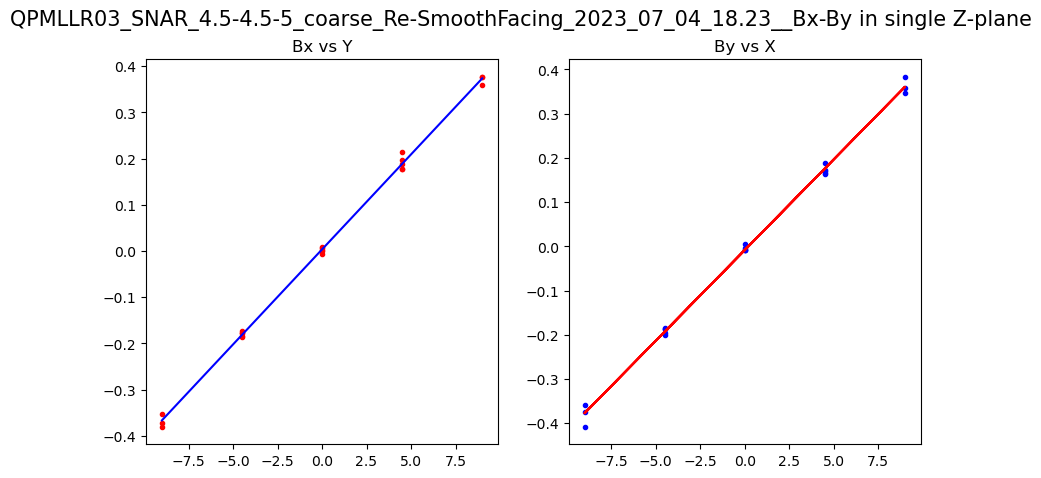

In [77]:
plt.figure(figsize=(10,5))
row = 10; col =1
plt.subplots_adjust(hspace =.4)
plt.suptitle("{}__Bx-By in single Z-plane".format(datafile), fontsize = 15)

n=12 # running index for Z-plane numbers


from scipy.optimize import curve_fit
def func_y(x,B_00,B_10): #considering ideal equation
    return B_00 + B_10*x

def func_x(y,B_00,B_01): #considering ideal equation
    return B_00 + B_01*y

fit_y = func_y(x_local_Z[n],By_00[n],By_10[n])
fit_x = func_x(y_local_Z[n],Bx_00[n],Bx_01[n])

plt.subplot(121)
plt.plot(y_local_Z[n],Bx_Z[n],'.r')
plt.plot(y_local_Z[n],fit_x,'-b')
plt.title('Bx vs Y')

plt.subplot(122)
plt.plot(x_local_Z[n],By_Z[n],'.b')
plt.plot(x_local_Z[n],fit_y,'-r')
plt.title('By vs X')

plot_7='{}__Bx-By in single Z-plane.pdf'.format(datafile)
save_fig(plot_7)


Number of Z-Planes =  43
Number of Rows = 6
Number of Columns = 8


/var/folders/w6/v997knsd7d96w95w4zltbrrc0000gp/T/ipykernel_10946/2730462518.py:14: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(G_func,z_local_val[i],n=x)


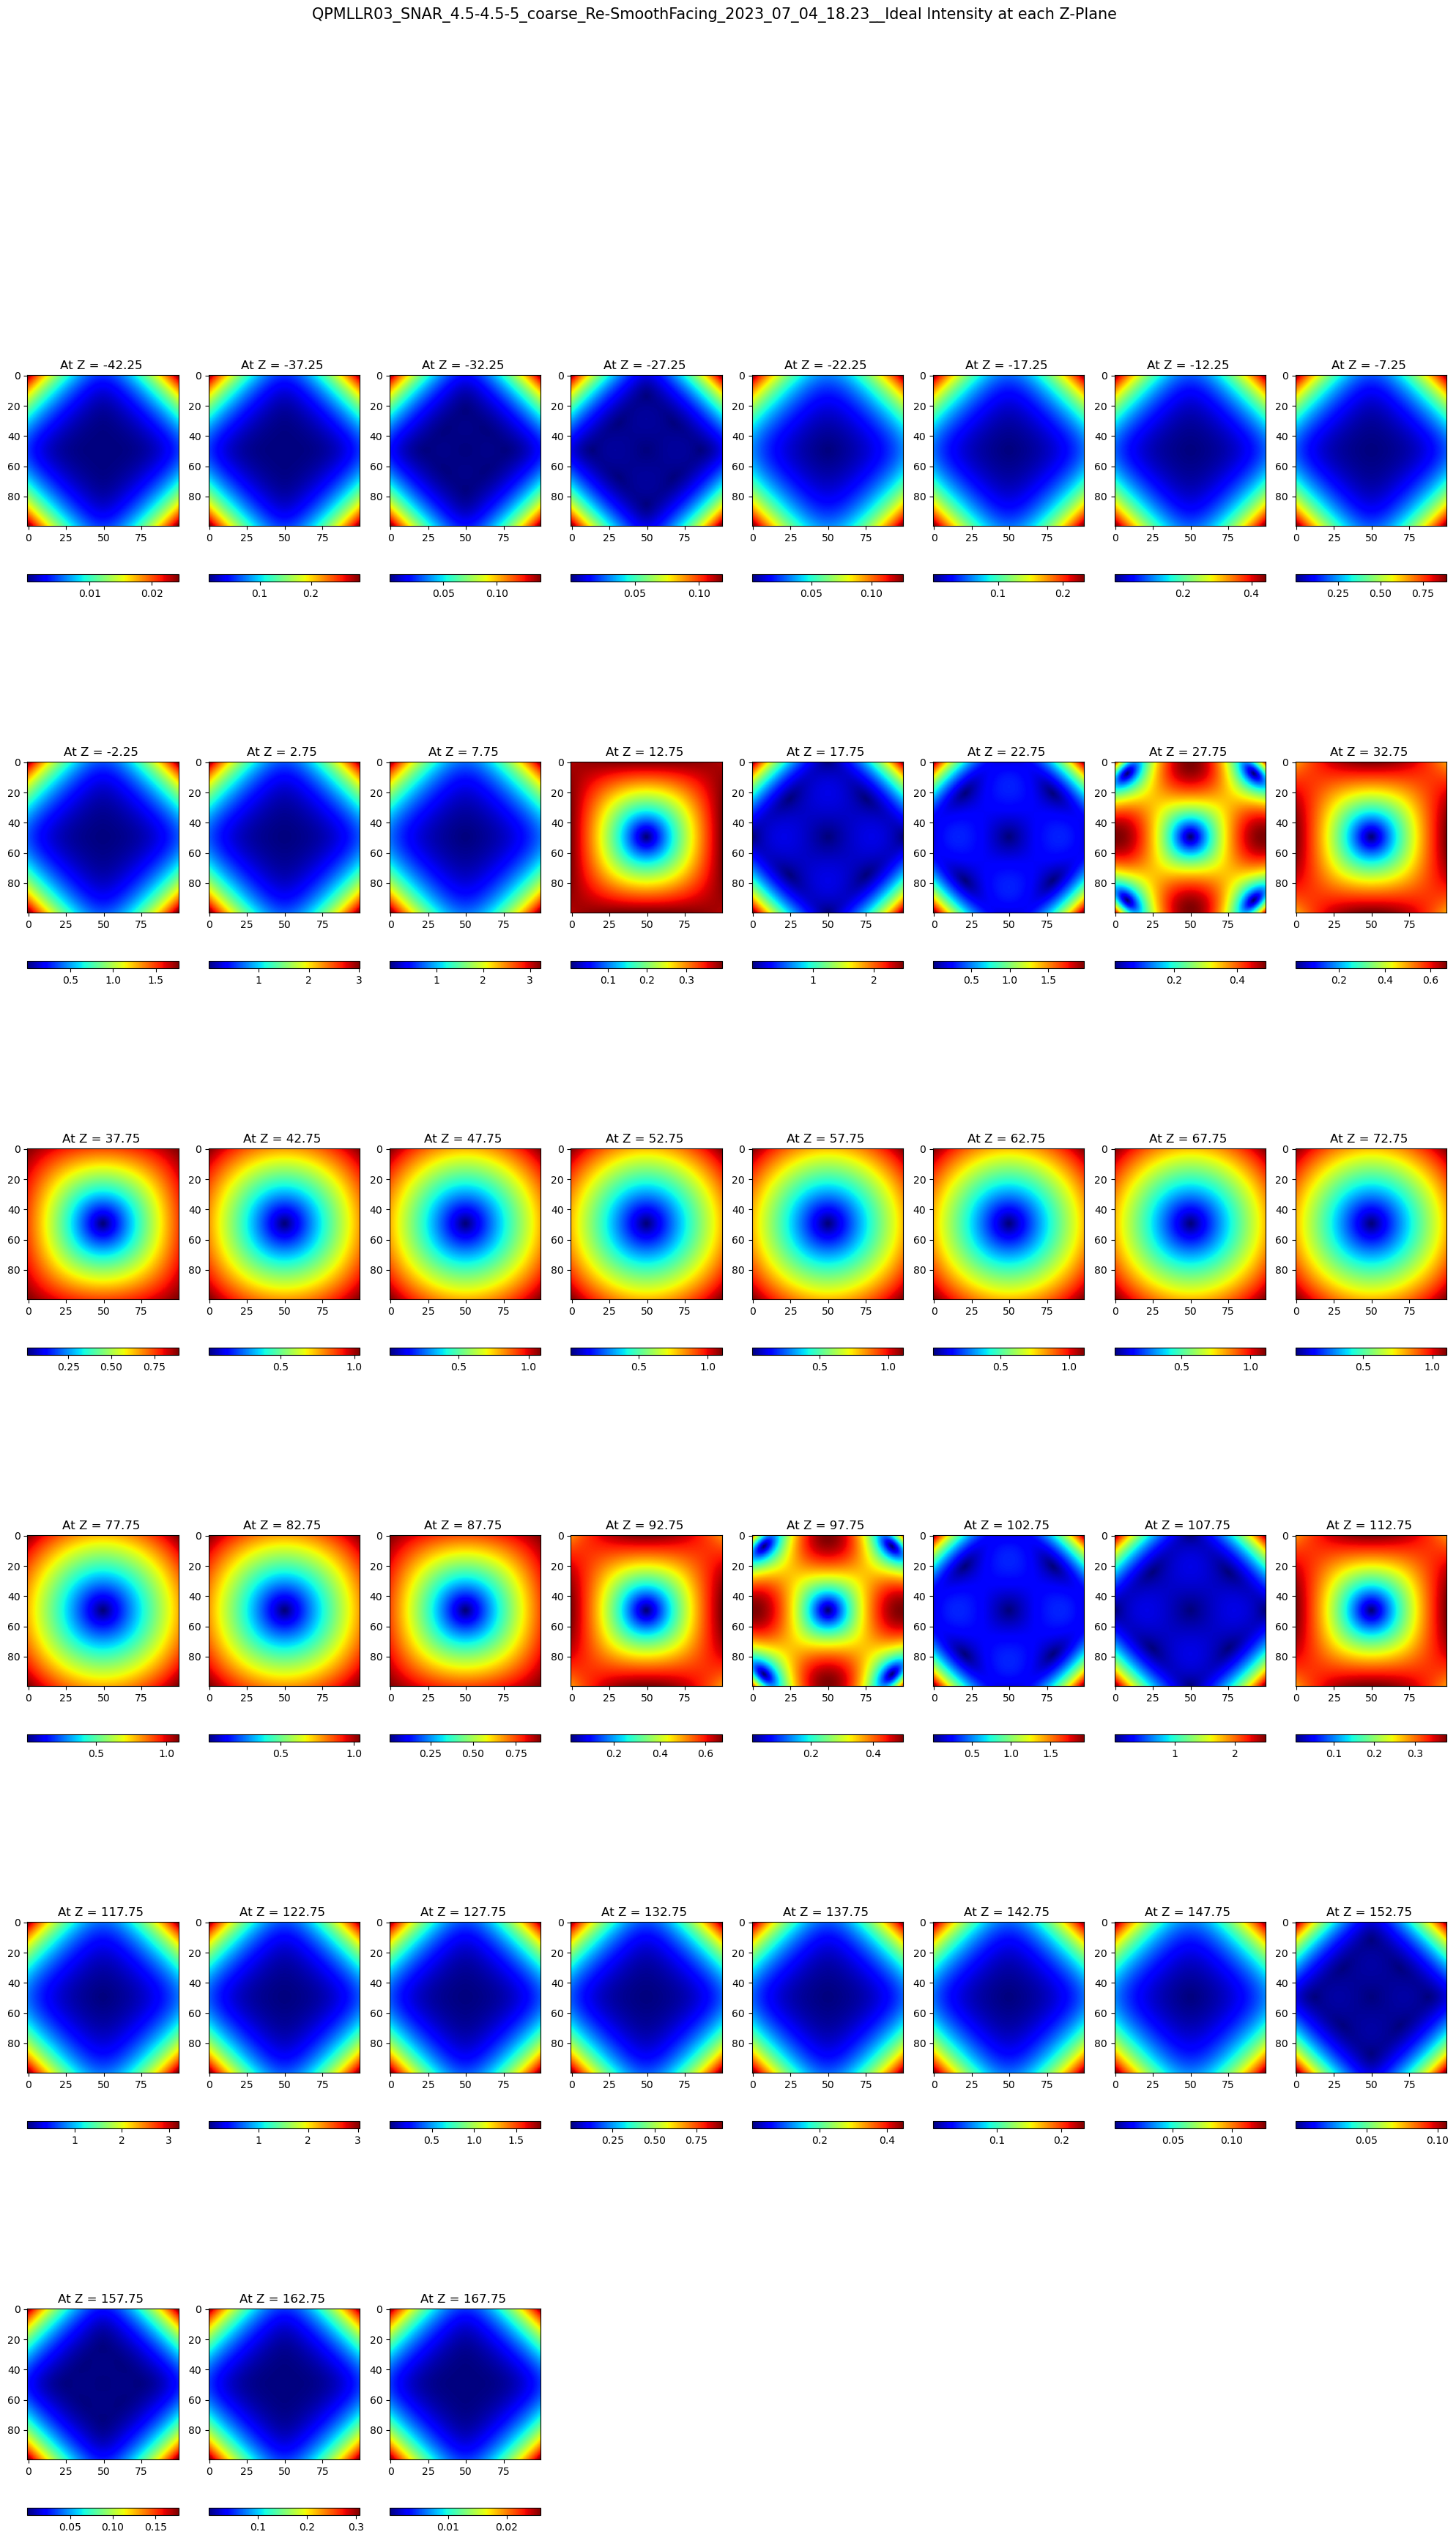

In [78]:
from sympy import *
from scipy.misc import derivative 

def G_func(z): #Enge Parametrized function
    def enge_arg(s_d):    
        #s_d = s - s_0
        Pn = c0 + c1*s_d + c2*s_d**2 + c3*s_d**3
        return 1/(1 + np.exp(Pn))
    f1 = enge_arg(-(z-zl)/D)
    f2 = enge_arg((z-zr)/D)
    return G*(f1 * f2) #parameters values are called from earlier shell of Enge's Parametrization

def G_deriv(x):
    return derivative(G_func,z_local_val[i],n=x)

print("Number of Z-Planes = ",len(z_local_val))

row = int(input("Number of Rows = "))
col = int(input("Number of Columns = "))

plt.figure(figsize=(25,40))
plt.subplots_adjust(hspace =.2)
plt.suptitle("{}__Ideal Intensity at each Z-Plane".format(datafile), fontsize = 15)

for i in range(0,step):
    radius = D/2
    x = np.linspace(-radius,radius,100);y = np.linspace(-radius,radius,100)
    xx, yy = np.meshgrid(x, y, sparse=True)
    Bx_ideal = G_func(z_local_val[i]) * yy + G_deriv(2)*(3*xx**2*yy + yy**3)
    By_ideal = G_func(z_local_val[i]) * xx + G_deriv(2)*(3*yy**2*xx + xx**3)
    net_ideal = np.sqrt(Bx_ideal**2 + By_ideal**2)
    
    plt.subplot(row, col, i+1)
    plt.imshow(net_ideal,cmap='jet')
    plt.colorbar(orientation="horizontal")
    plt.title("At Z = {} ".format(z_local_val[i]))
    
plot_8 = '{}__Ideal Intensity at each Z-Plane.pdf'.format(datafile)
save_fig(plot_8)


(19, 53)


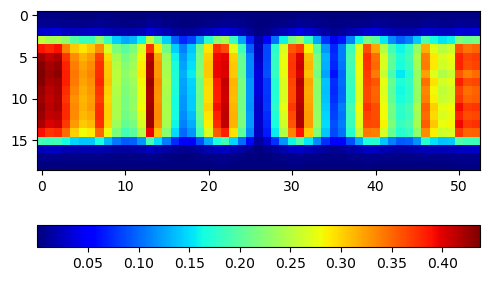

In [75]:
#EXTRA
#Tried to plot intensity plot in a different maanner (variation along with Z)
'''
Bx_Z=np.array(Bx_Z)
By_Z=np.array(By_Z)
net_field= np.sqrt(np.square(Bx_Z)+np.square(By_Z))

x_local_Z = np.array(x_local_Z)
y_local_Z = np.array(y_local_Z)

plt.figure(figsize=(5,4))
plt.imshow(net_field,cmap='jet')
plt.colorbar(orientation="horizontal")

print(Bx_Z.shape)
'''